# <center> Lecture 04 - Model Selection</center>
## <center> Training Data Process</center>

# 1. Training Data Procedures (EDA, Preprocessing, Feature Engineering)
# A. Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
DF = pd.read_csv('Housing.csv')

# B. Exploratory Data Analysis (EDA)

<font size="4"> Explorartory Data Analysis (EDA) is to learn about the data.
- <font size="4"> There are 10 columns: `longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`, `ocean_proximity`.</font>
- <font size="4"> use `shape` to find the size of data - 20640 rows and 10 columns. We are going to treat the problem as a supervised learning problem to predict `meadian_house_value` which we will call it a **target** and the rest **features**, **predictors**, or **attributes**. We call the rows **examples** or **observations** </font>
- <font size="4"> use `head` to observe how data looks is structured. However, it does not give descriptions of data. </font>

In [3]:
DF.shape

(20640, 10)

In [4]:
DF.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


 
- <font size="4"> use `info()` to look for number of rows, and each attribute's type and number of non-null values. 
- <font size="4">notice `total_bedrooms` has only 20,433 non-null values while other attributes have 20,640 non-null values. This means that `total_bedrooms` have 207 missing values or *no observations*. 
- <font size="4">all attributes are numerical except the `ocean_proximity`. We see that this is a text data. </font>

In [6]:
DF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<font size="4"> The `describe()` method shows a summary of the numerical attributes. The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (see `total_bedrooms`). The std row shows the standard deviation. The 25%, 50%, and 75% rows show the corresponding *percentiles* - the value below which a given percentage of observations in a group of observation falls. 

 <font size="4"> We can aggregate data by the group to learn about data. For example, if we want to know about average of each feature by `ocean_proximity`, we can do the following.</font>

In [7]:
DF.groupby("ocean_proximity").agg({'mean'})

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
,mean,mean,mean,mean,mean,mean,mean,mean,mean
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


## B.1. Visualization

<font size="4">Visualization is one of the easiest ways to understand the data structure - it is not only limited to the statistical measurements but also insights to learn about the data itself. </font>

In [8]:
import matplotlib.pyplot as plt

<font size="4"> The scatter plots made provides us the geomatrical information of data. 
- We can see that the houses are located in California bayside. 
- We can see the poluations of data and understand which part of bayside have high and low median house value. 

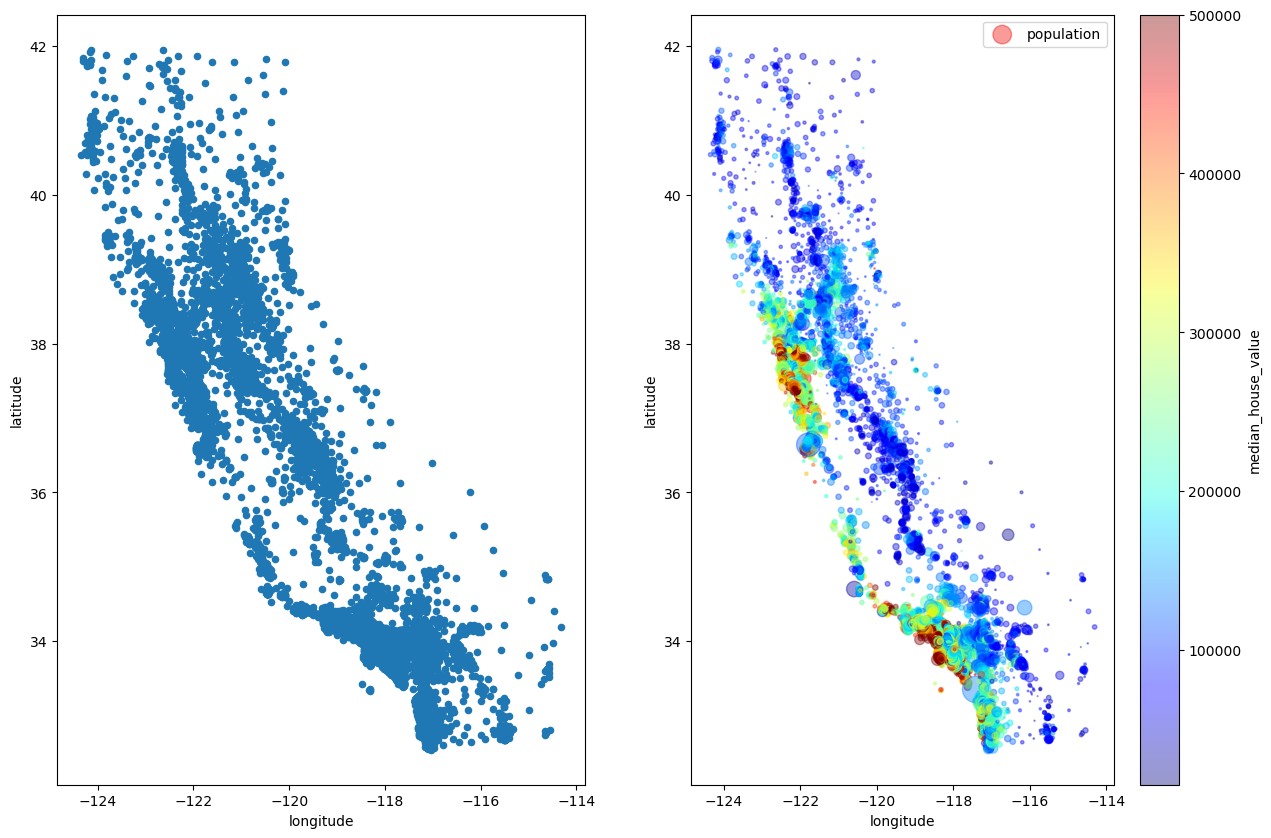

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
DF.plot(kind="scatter",x="longitude",y="latitude",ax=ax1)
DF.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4, s=DF["population"]/100,
       label="population",c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax2)
plt.legend()
plt.show()

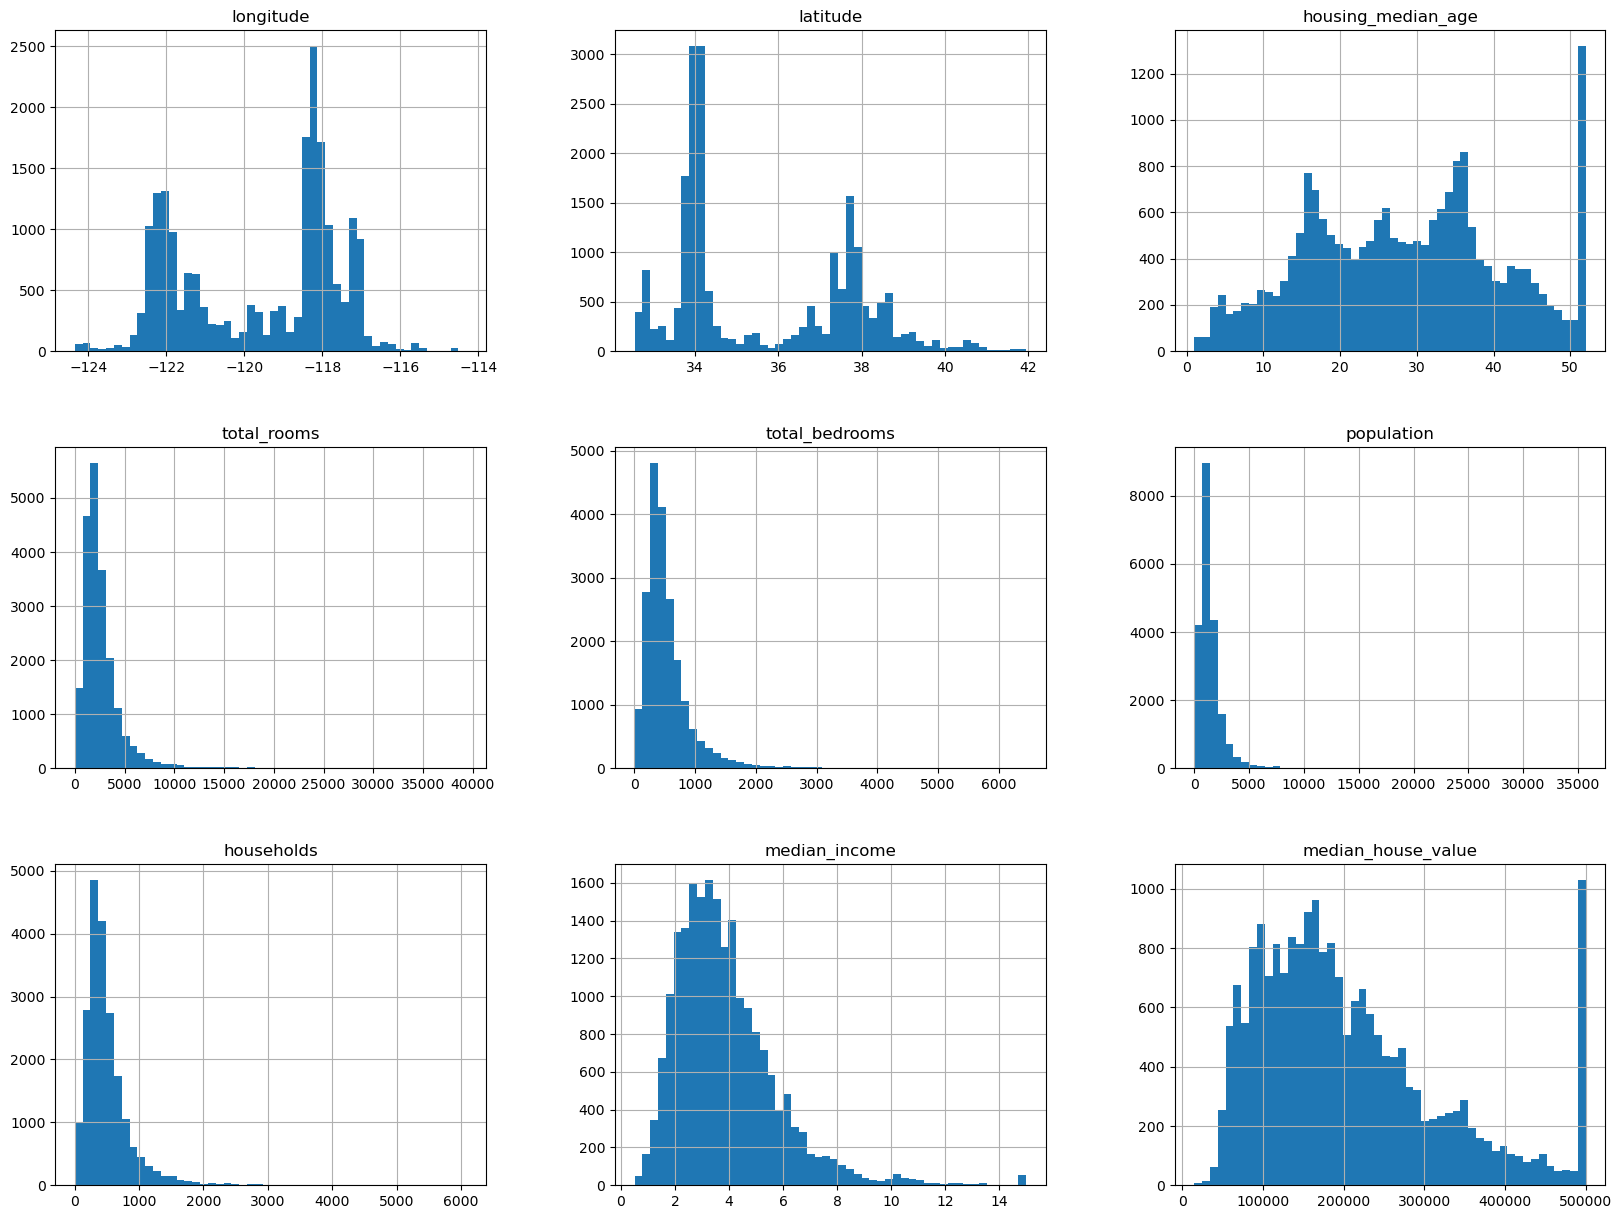

In [10]:
DF.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
from pandas.plotting import scatter_matrix

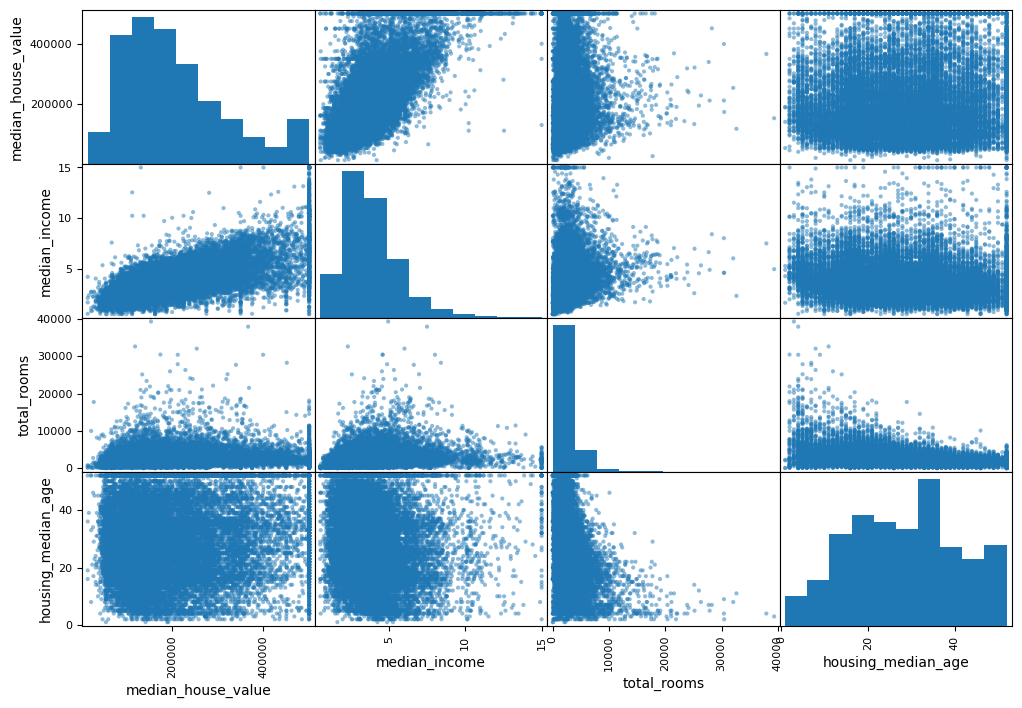

In [12]:
features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(DF[features], figsize=(12,8))
plt.show()

## B.2. Data Distributions

In [13]:
from scipy.stats import lognorm
import statsmodels.api as sm

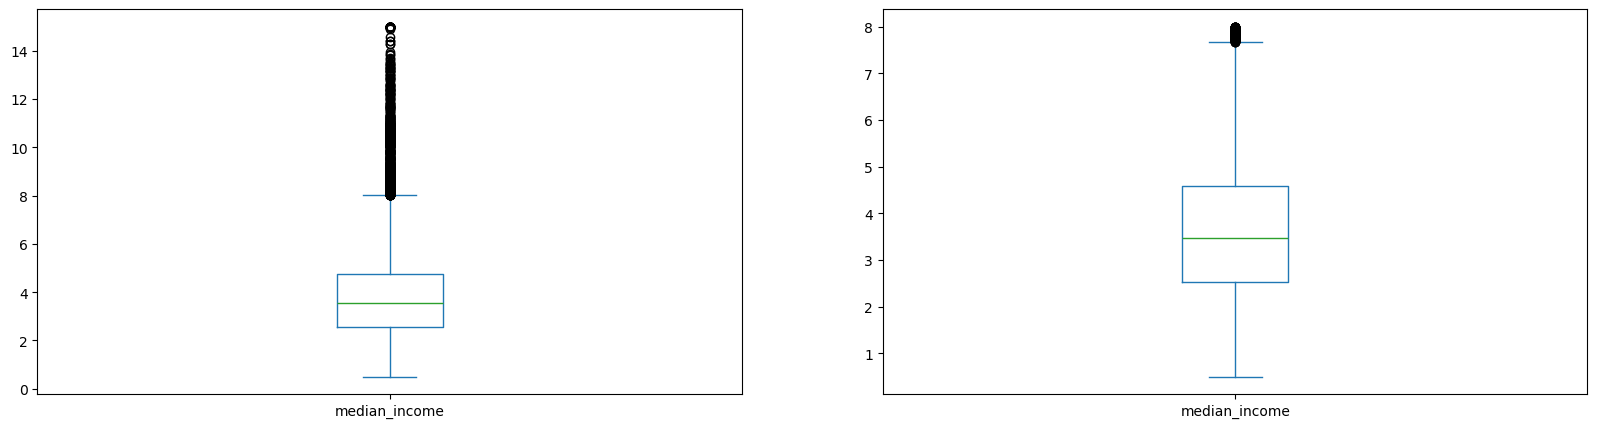

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
DF['median_income'].plot.box(ax=ax1)
DF_ = DF[DF['median_income']<=8]
DF_['median_income'].plot.box(ax=ax2)
plt.show()

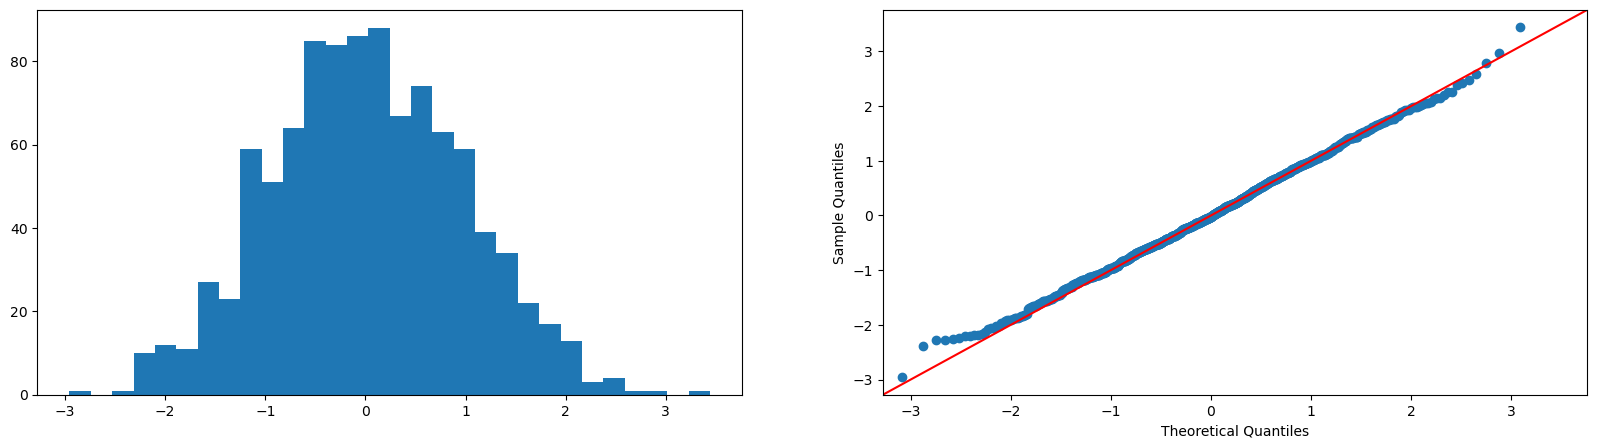

In [15]:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.hist(s,bins=30)
fig = sm.qqplot(s, line='45',ax=ax2)
plt.show()

- If data points are roughly along a straight diagonal line, we typically assume a dataset is normally distributed. 

In [16]:
from scipy.stats import kstest
kstest(s, 'norm')

KstestResult(statistic=0.02080316468268674, pvalue=0.7715557800421794, statistic_location=-1.2491606277278622, statistic_sign=-1)

- a Kolmogorov-Smirnov test (KS test) has a null hypothesis that the data is drawn from the normal distribution. We reject the null hypothesis when the p-value is $<0.05$.

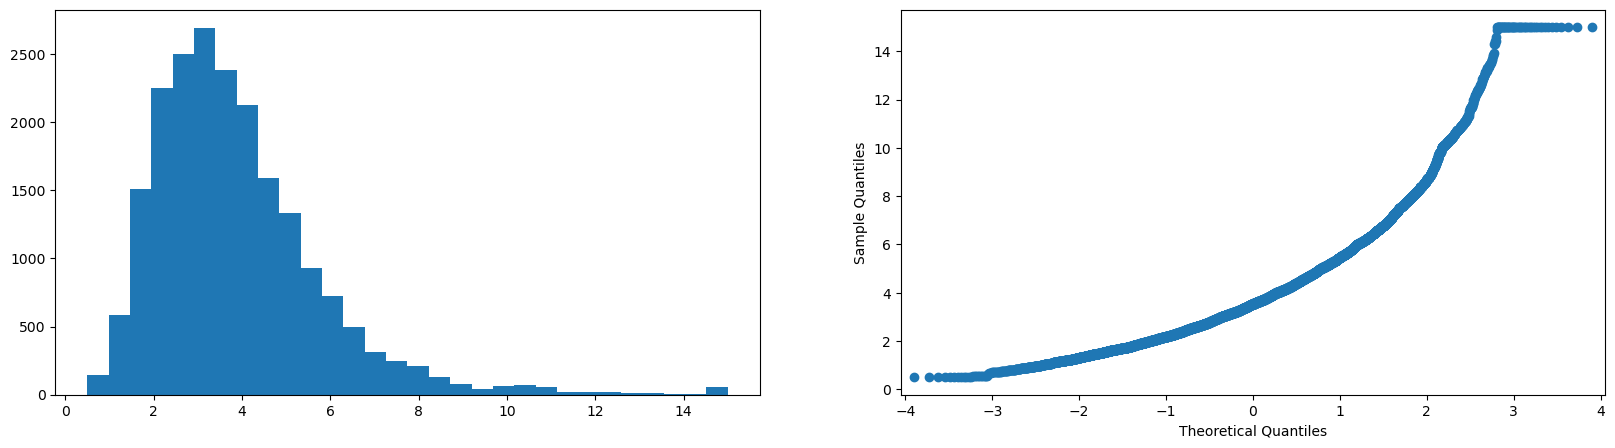

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.hist(DF['median_income'],bins=30)
fig = sm.qqplot(DF['median_income'],ax=ax2)
plt.show()

In [18]:
kstest(DF['median_income'], 'norm')

KstestResult(statistic=0.8953266796146241, pvalue=0.0, statistic_location=1.5809, statistic_sign=-1)

## B.3. Correlation between features and to the target
- One good way to reduce the data size.
- Correlations between two features explains how they are related to each other. 
    - Pearson correlation coefficient is widely used. 
    $$Cov(x,y) = \sum_{i=1}^N(x_i - \bar{x})(y_i-\bar{y})$$
    $$\sigma_x = \sqrt{\frac{\sum_{i=1}^N(x_i-\bar{x})^2}{N}}$$
    $$\rho_{x,y}=\frac{Cov(x,y)}{\sigma_x\sigma_y}$$
    - Ranges from -1 to 1. 
    - Must be tested when supervied learning algorithms are applied. 

In [19]:
corr_matrix = DF[['total_bedrooms','total_rooms','households','median_house_value']].corr()
corr_matrix

,total_bedrooms,total_rooms,households,median_house_value
total_bedrooms,1.000000,0.930380,0.979728,0.049686
total_rooms,0.930380,1.000000,0.918484,0.134153
households,0.979728,0.918484,1.000000,0.065843
median_house_value,0.049686,0.134153,0.065843,1.000000


- For example, if $X$ and $Y$ are tightly correlated 
    - We can use only $X$ as an independent variable.
    - Or make a new feature call $Z$ that is a function of $X$ and $Y$, $Z=f(X,Y)$, as an independent variable.

# C. Preprocessing
# C.1. Missing value imputation
- The observation we intended to collect them but did not get them.
    - Data entry issues, equipment errors, incorrect measurement, etc.
        - An individual may only have responded to specific questions in a survey, but not all.
- Problems of missing data
    - Reduce the representativeness of the sample.
    - Complicate data handling and analysis.
    - Bias result from differences between missing and complete data.

## C.1.a. Drop the missing rows or columns
- Elimination of examples (rows) with missing values
- Elimination of features (columns) with missing values
- Either will reduce the sample size

In [20]:
DF_=DF.drop('total_bedrooms',axis=1)
DF_.shape

(20640, 9)

In [21]:
DF_=DF.dropna()
DF_.shape

(20433, 10)

In [22]:
DF_.shape[0]/DF.shape[0]

0.9899709302325581

- Dropping the total bedrooms column is not a good idea. 
- Dropping with the total bedrooms missing rows cannot hurt much.
    - In this case, it can be the easiest handling.  

## C.1.b. Imputing missing values
- Usually impute with the mean or the median of the continuous features.
- Impute with the mode or the most frequently appeared integer for discrete features. 

In [23]:
import matplotlib.pyplot as plt

In [24]:
DF['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [25]:
print(round(DF['total_bedrooms'].mean(),2))
print(DF['total_bedrooms'].median())

537.87
435.0


In [26]:
DF_ = DF
X0 = DF_['total_bedrooms'].dropna()
X1=DF_['total_bedrooms'].fillna(value=DF_['total_bedrooms'].mean())
X2=DF_['total_bedrooms'].fillna(value=DF_['total_bedrooms'].median())
X3=DF_['total_bedrooms'].fillna(value=0)
for i,x in zip(range(0,4),[X0,X1,X2,X3]):
    print(f"The mean of X{str(i)} is {round(x.mean(),2)} and the median is {round(x.median(),2)}")

The mean of X0 is 537.87 and the median is 435.0
The mean of X1 is 537.87 and the median is 438.0
The mean of X2 is 536.84 and the median is 435.0
The mean of X3 is 532.48 and the median is 431.0


- We do not see much differences in imputations!

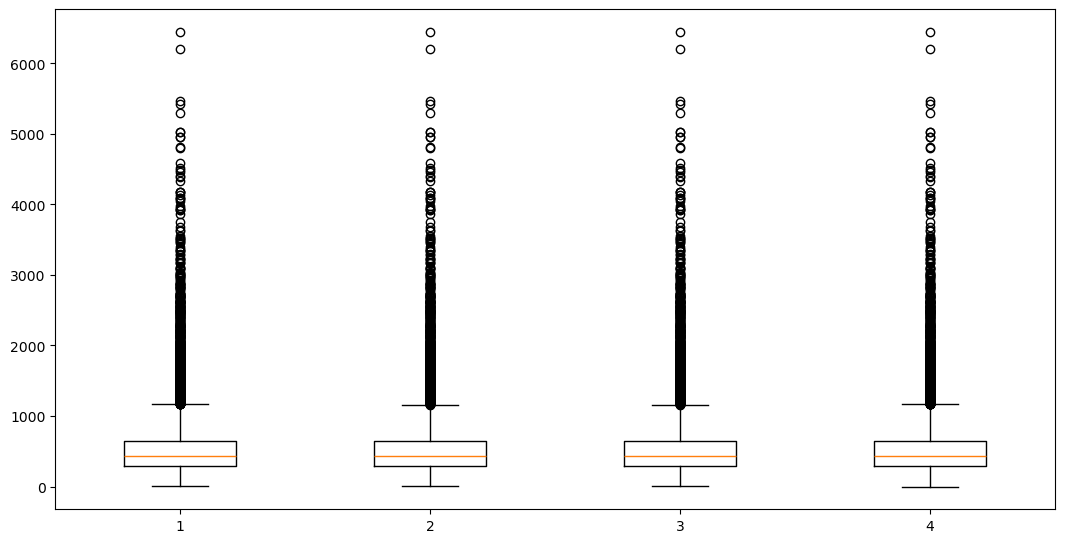

In [27]:
X = [X0,X1,X2,X3]
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(X)
plt.savefig('./boxplot.png',dpi=600)
plt.show()

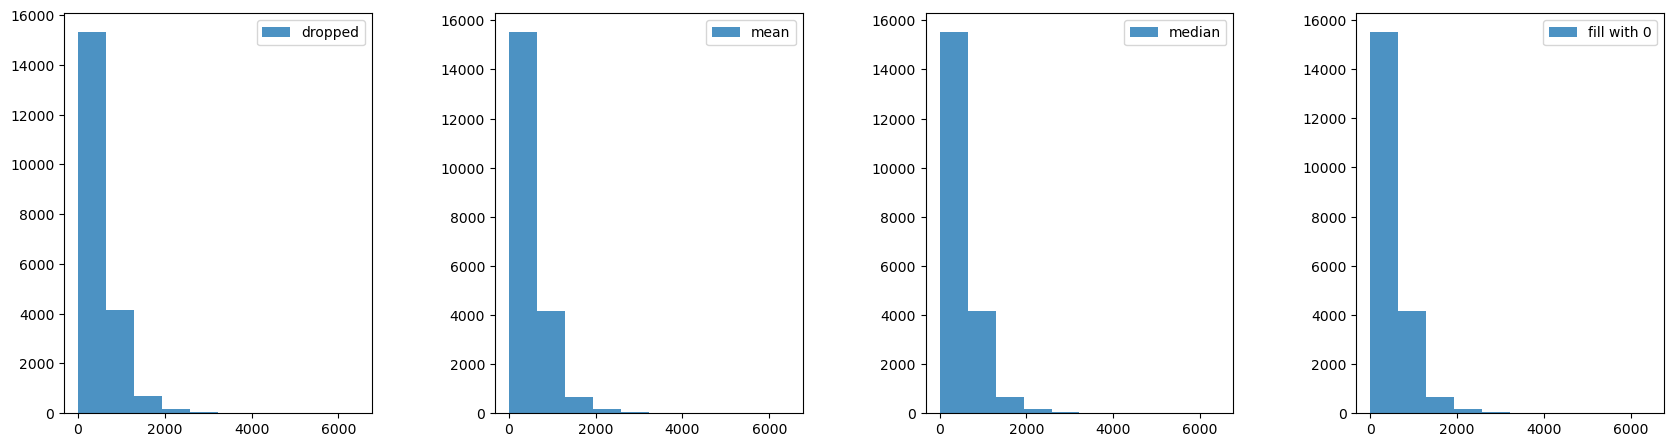

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
for x,ax,la in zip([X0,X1,X2,X3],[ax1,ax2,ax3,ax4],['dropped','mean','median','fill with 0']):
    ax.hist(x,alpha=0.8,label=la)
    ax.legend()
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9,wspace=0.4,hspace=0.4)
#plt.savefig('./total_bedrooms_imputation_histogram.png',dpi=600)
plt.show()

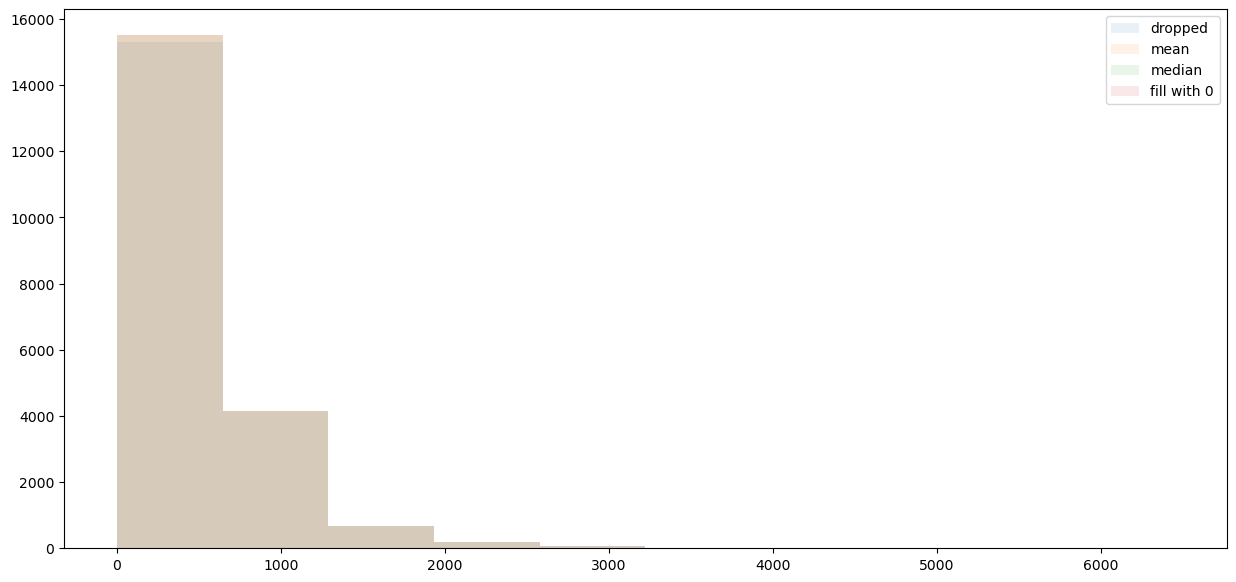

In [29]:
fig = plt.figure(figsize=(15,7))
for x,la in zip([X0,X1,X2,X3],['dropped','mean','median','fill with 0']):
    plt.hist(x,alpha=0.1,label=la)
plt.legend()
#plt.savefig('./total_bedrooms_imputation_histogram.png',dpi=600)
plt.show()

In [30]:
from scipy.stats import ks_2samp, ks_1samp

In [31]:
for x in [X1,X2,X3]:
    print(ks_2samp(X0,x))

KstestResult(statistic=0.00645339447473825, pvalue=0.7833422668265202, statistic_location=537.0, statistic_sign=1)
KstestResult(statistic=0.005011344507687643, pvalue=0.9575858124995899, statistic_location=434.0, statistic_sign=1)
KstestResult(statistic=0.01002906976744186, pvalue=0.25130346125424086, statistic_location=0.0, statistic_sign=-1)


- Kolmogorov-Smirnov (KS) test allows the 2-sample test as the greatest distance between the cumulative distribution function of each sample. 
- Suppose we wish to test the null hypothesis that two samples were drawn from the same distribution. We choose a confidence level of 95%; that is, we will reject the null hypothesis in favor of the alternative if the p-value is less than 0.05.

X0= 450.53
X1= 450.53
X2= 450.53
X3= 450.53


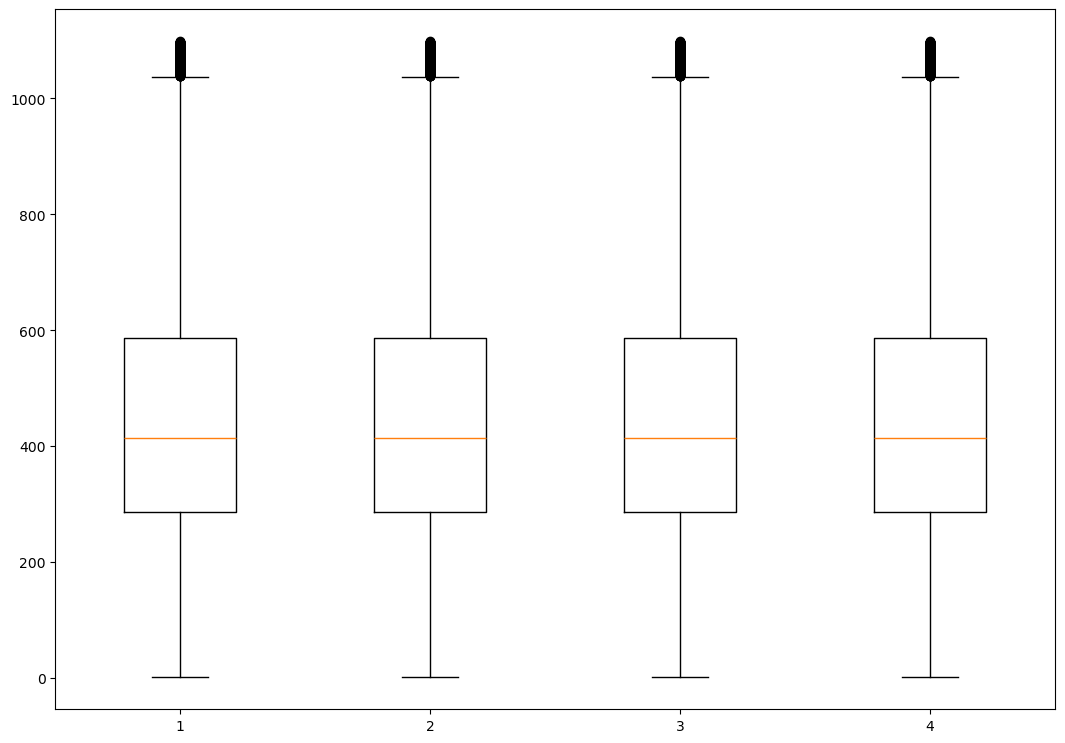

In [32]:
DF_ = DF[DF['total_bedrooms']<1100]
X0 = DF_['total_bedrooms'].dropna()
X1=DF_['total_bedrooms'].fillna(value=DF['total_bedrooms'].mean())
X2=DF_['total_bedrooms'].fillna(value=DF['total_bedrooms'].median())
X3=DF_['total_bedrooms'].fillna(value=0)
print("X0=",round(X0.mean(),2))
print("X1=",round(X1.mean(),2))
print("X2=",round(X2.mean(),2))
print("X3=",round(X3.mean(),2))
X = [X0,X1,X2,X3]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(X)
plt.show()

In [33]:
for x in [X1,X2,X3]:
    print(ks_2samp(X0,x))

KstestResult(statistic=0.0, pvalue=1.0, statistic_location=1.0, statistic_sign=1)
KstestResult(statistic=0.0, pvalue=1.0, statistic_location=1.0, statistic_sign=1)
KstestResult(statistic=0.0, pvalue=1.0, statistic_location=1.0, statistic_sign=1)


## C.2. Data in different scales
Approaches to bring different values onto the same scale
- **Normalization**: rescale the feature to a range of (0,1)
    $$x_{norm}^j = \frac{x^j-x_{min}}{x_{max}-x_{min}}$$
    where $j$ is the column number. 
    - To changes values to a common scale (between 0 and 1) without distorting differences in the ranges of values.
    - Use when features are in different ranges. 
    - Use when distribution is not known or skewed. 
    - Use for specific ML algorithms, e.g., K-Nearest Neighbors and Neural Networks, Linear Regressions, etc.

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

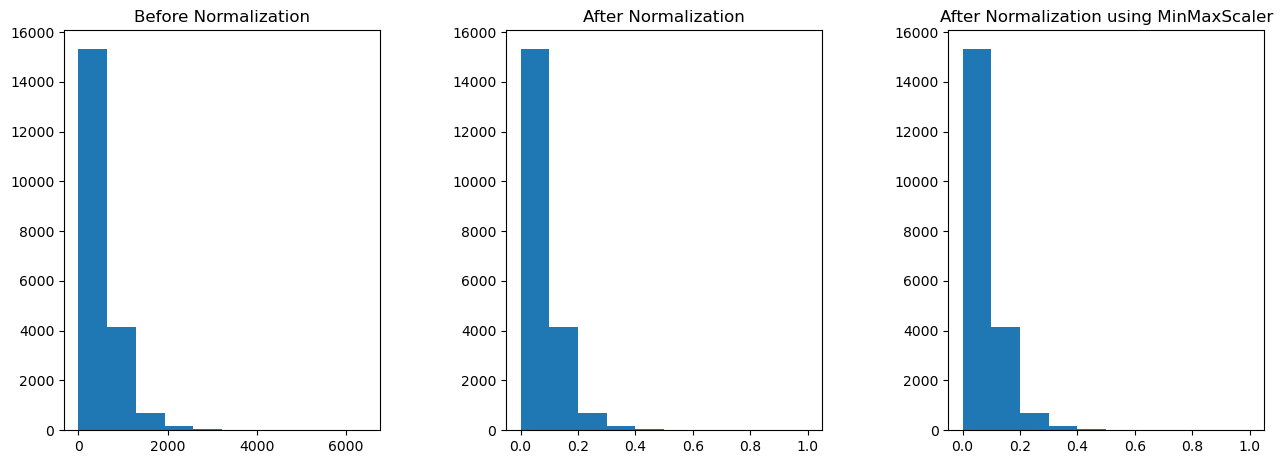

KstestResult(statistic=0.9899224806201551, pvalue=0.0, statistic_location=0.9635319677219119, statistic_sign=-1)
KstestResult(statistic=0.0019379844961240345, pvalue=0.999999999999683, statistic_location=0.07247051520794537, statistic_sign=-1)


In [35]:
X=DF['total_bedrooms']
X_max, X_min = X.max(), X.min()
X_ = (X-X_min)/(X_max-X_min)
X__ = MinMaxScaler().fit_transform(np.array(X).reshape(-1,1)) # Reshape to 2d
X__ = X__.reshape(1,len(X))[0] #Flat to 1-D
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
ax1.hist(X)
ax2.hist(X_)
ax3.hist(X__.reshape(1,len(X))[0])
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9,wspace=0.4,hspace=0.4)
ax1.set_title('Before Normalization')
ax2.set_title('After Normalization')
ax3.set_title('After Normalization using MinMaxScaler')
plt.show()

print(ks_2samp(X, X_))
print(ks_2samp(X_, X__))

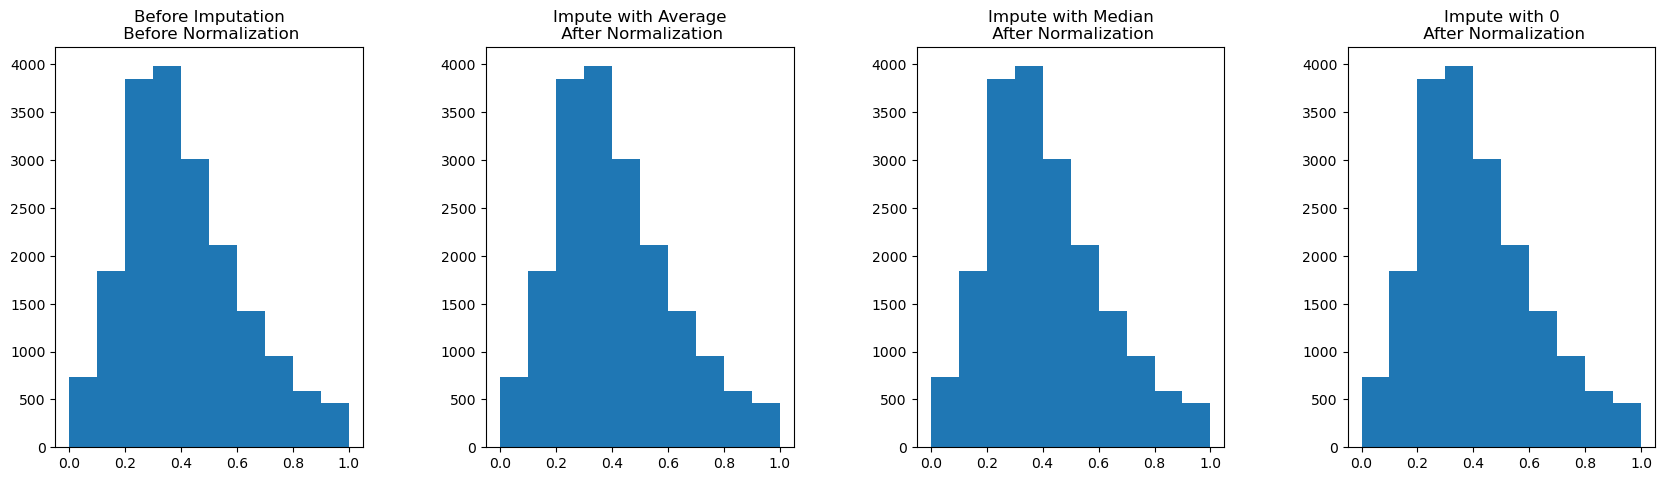

In [36]:
X0 = DF_['total_bedrooms'].dropna()
X0_max, X0_min = X0.max(), X0.min()
X0 = (X0-X0_min)/(X0_max-X0_min)
X1=DF_['total_bedrooms'].fillna(value=DF_['total_bedrooms'].mean())
X1_max, X1_min = X1.max(), X1.min()
X1 = (X1-X1_min)/(X1_max-X1_min)
X2=DF_['total_bedrooms'].fillna(value=DF_['total_bedrooms'].median())
X2_max, X2_min = X2.max(), X2.min()
X2 = (X2-X2_min)/(X2_max-X2_min)
X3=DF_['total_bedrooms'].fillna(value=0)
X3_max, X3_min = X3.max(), X3.min()
X3 = (X3-X3_min)/(X3_max-X3_min)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
ax1.hist(X0)
ax2.hist(X1)
ax3.hist(X2)
ax4.hist(X3)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9,wspace=0.4,hspace=0.4)
ax1.set_title('Before Imputation\n Before Normalization')
ax2.set_title('Impute with Average\n After Normalization')
ax3.set_title('Impute with Median\n After Normalization')
ax4.set_title('Impute with 0\n After Normalization')
plt.show()


In [37]:
for x in [X1,X2,X3]:
    print(ks_2samp(X0,x))

KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.0, statistic_sign=1)


- **Standardization**: re-center the feature to the mean and scaled by variance
    $$x_{std}^j= \frac{x^j-\mu_{x}}{\sigma_x}$$
    where $\mu_x$ is the average of $x^j$ and $\sigma_x$ is the standard deviation of $x_j$.
    - When measurements are in different units, we standardize the feature around the center 0 with 1𝜎.
    - Values at different scales can cause bias. 
    - Assumes that data has a Gaussian distribution and if ML algorithm holds the assumption (e.g., Linear Regression, Logistic Regression, Linear Discriminant Analysis). 

- Data scaling should be one of the first steps of data preprocessing for  many machine learning algorithms
     - Some machine learning algorithms can handle data in different scales (e.g.,  decision trees and random forests)

In [38]:
sc = StandardScaler()
X_ = sc.fit_transform(np.array(X).reshape(-1,1))

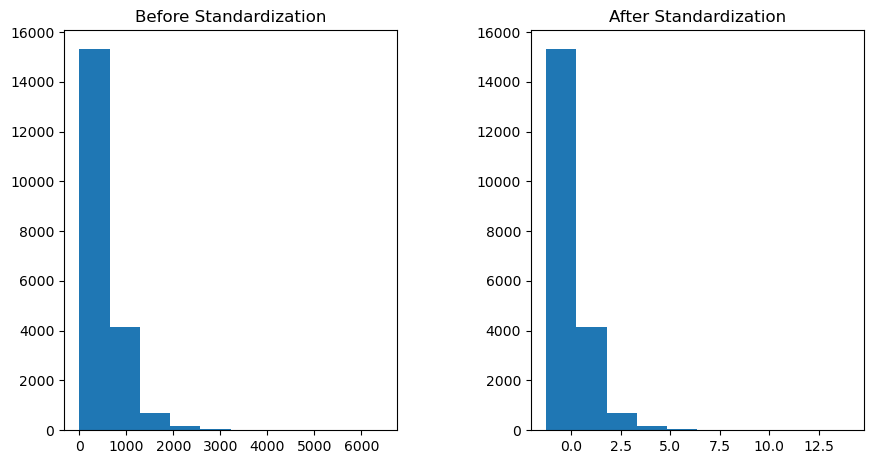

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(X)
ax2.hist(X_)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax1.set_title('Before Standardization')
ax2.set_title('After Standardization')
plt.show()

## C.3. Skewed Data Transformation
- Real-world data can be messy and contains attributes that need modifications before they can be used in modeling. 
- In case of normal distribution, the mean, median, and mode are approximately close to each other at the center of distribution. 
- The skewness of data can be determined by how these quantities are related to one another. 
    - **Right** skewed or **Positive** skewed: Mean > Median > Mode
    - **Left** Skewed or **Negative** skewed: Mode > Median > Mean
    - The tail region may act outliers that can affect the model’s performance in regression models. 

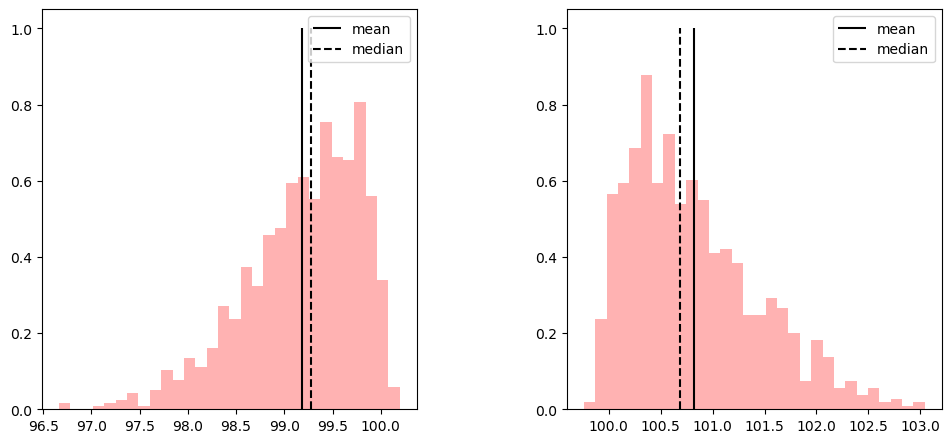

In [40]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

numValues, maxValue = 1000,100
skewnessL,skewnessR = -10,10   #Negative values are left skewed, positive values are right skewed.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for ax, skewness in zip([ax1,ax2],[-10,10]):
    random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)
    ax.hist(random,30,density=True, color='red',alpha=0.3)
    ax.vlines(np.mean(random),0,1.0,color='black',label='mean')
    ax.vlines(np.median(random),0,1.0,color='black',linestyle='--',label='median')
    ax.legend(loc='best')
plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

### Handling skewness:
- Log transformation transforms skewed distribution to a normal distribution. (usually applies to right skewed data)
    - Values $\le0$ cannot be transformed. 
    - Add some constant so the minimum value be greater than $1\to\log{(1)}=0$ 
- Remove outliers (both)
- Normalize (applies to right skewed data)
- Cube root, square root (applies to right skewed data)
- Reciprocal (applies to right skewed data)
- Square (applies to left skewed data)
- Box Cox transformation (applies to both)
  - Transform using equations below:
  
  - $y(\lambda) = \begin{cases}
                (y^{\lambda}-1)/\lambda & \text{if $\lambda\ne0$ and $y>0$}\\
                \log{y} & \text{if $\lambda=0$ and $y>0$} 
\end{cases}$
  - $y(\lambda) = \begin{cases}
                ((y+\lambda_2)^{\lambda_1}-1)/\lambda_1 & \text{if $\lambda_1\ne0$ and $y<0$} \\
\log{y+\lambda_2} & \text{if $\lambda_1=0$ and $y<0$} \\
\end{cases}$
   - Usually, $\lambda=[−5,5]$ but we use a $\lambda$ value that gives the best approximation to a normal distribution.  


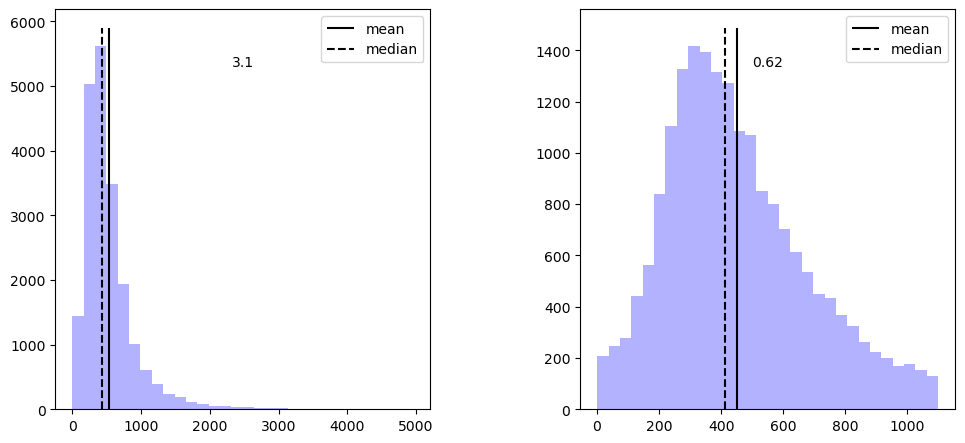

KstestResult(statistic=0.999576671066989, pvalue=0.0, statistic_location=4.0, statistic_sign=-1)
KstestResult(statistic=0.9995462097205983, pvalue=0.0, statistic_location=4.0, statistic_sign=-1)


In [41]:
from scipy import stats
random0 = DF['total_bedrooms'][DF['total_bedrooms']<5000]

random1 = DF['total_bedrooms'][DF['total_bedrooms']<1100]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for ax, random in zip([ax1,ax2],[random0,random1]):
    ax.hist(random,30, color='blue',alpha=0.3)
    y_min, y_max = ax.get_ylim()
    ax.vlines(np.mean(random),y_min,y_max,color='black',label='mean')
    ax.vlines(np.median(random),y_min,y_max,color='black',linestyle='--',label='median')
    ax.text((random.max()+random.min())/2,y_max*0.90,round(random.skew(),2),ha='center')
    ax.legend(loc='best')
plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()
print(ks_1samp(random0,stats.norm.cdf))
print(ks_1samp(random1,stats.norm.cdf))

In [42]:
from scipy import stats

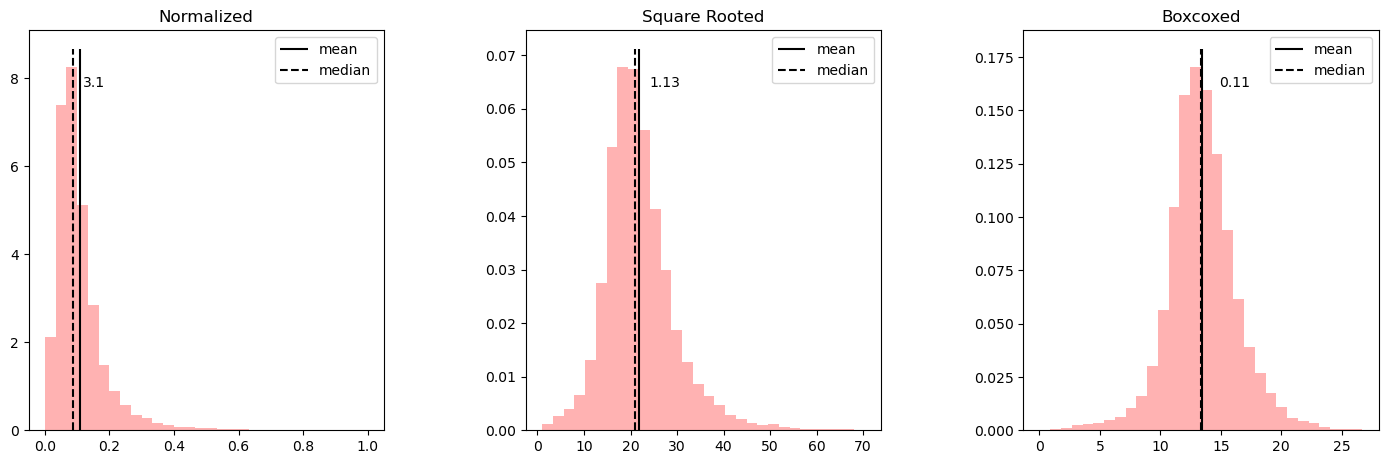

In [43]:
X = DF['total_bedrooms'][DF['total_bedrooms']<5000].dropna()
random2 = (X-X.min())/(X.max()-X.min())
random3 = np.sqrt(X)
random4 = stats.boxcox(X)[0]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
for ax, random, rd in zip([ax1,ax2,ax3],[random2,random3,random4],['Normalized','Square Rooted','Boxcoxed']):
    ax.hist(random,30,density=True, color='red',alpha=0.3)
    y_min, y_max = ax.get_ylim()
    ax.vlines(np.mean(random),y_min,y_max,color='black',label='mean')
    ax.vlines(np.median(random),y_min,y_max,color='black',linestyle='--',label='median')
    ax.text(np.mean(random)*1.1,y_max*0.90,round(pd.Series(random).skew(),2),ha='left')
    ax.legend(loc='best')
    ax.set_title(rd)
plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

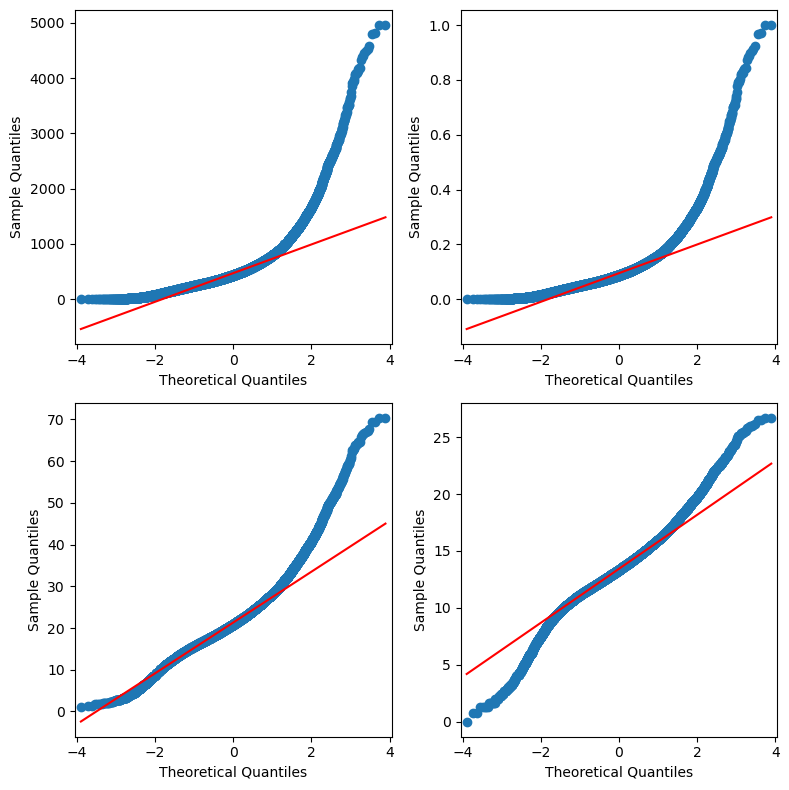

In [44]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(8,8))
fig = sm.qqplot(X, line='q', ax=ax1)
fig = sm.qqplot(random2, line='q',ax=ax2)
fig = sm.qqplot(random3, line='q', ax=ax3)
fig = sm.qqplot(random4, line='q', ax=ax4)
plt.tight_layout()
plt.show()

## C.4. Handling Categorical Data
- for ordinal data, convert the strings into comparable integer values
    - E.g., XL > L > M > S $\to$ 5 (XL) > 4 (L) > 3 (M) > 2 (S)
    - Note that the value of integer itself has no special meaning besides for ordering
    - Mapping needs to be unique: 1 to 1 mapping for going back and forth
- For nominal data, convert the strings into integers
    - E.g., Red (0), Blue (1), Green (2)
    - A common practice to avoid software glitches in handling strings
    - Note that the value of integer itself has no special meaning (non-comparable)
    - Mapping needs to be unique: 1 to 1 mapping for going back and forth
- To avoid mistakenly comparing encoded integers for nominal data, one-  hot encoding can be used
    - Each unique value becomes a separate dummy feature

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
DF.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY


In [47]:
DF['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [48]:
encoder = LabelEncoder()
housing_cat = DF["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [49]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [50]:
set(housing_cat_encoded)

{0, 1, 2, 3, 4}

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = housing_cat_encoded.reshape(len(housing_cat_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


# D. Feature Engineering

- Feature engineering extract features using domain knowledge
    - Improves the performance of ML 
    - Sometimes can be considered as applied ML

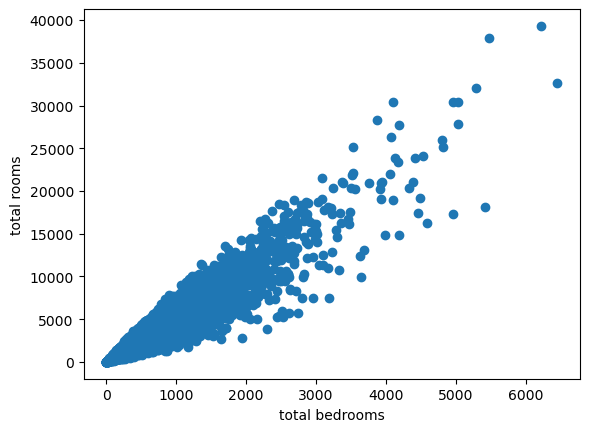

the correlation is 0.9303795046865072


In [53]:
plt.scatter(DF['total_bedrooms'],DF['total_rooms'])
plt.xlabel('total bedrooms')
plt.ylabel('total rooms')
plt.show()

from scipy.stats import pearsonr
X=DF[['total_bedrooms','total_rooms']].dropna()
corr, _ = pearsonr(X['total_bedrooms'],X['total_rooms'])
print(f'the correlation is {corr}')

In [54]:
import warnings
warnings.simplefilter('ignore')

In [55]:
df_x = DF[['total_bedrooms','total_rooms','households']]
df_x['new_total_bedrooms'] = df_x['total_rooms']*corr
df_x['total_bedrooms'] = df_x['total_bedrooms'].fillna(df_x['new_total_bedrooms'])
df_x.isnull().sum()

total_bedrooms        0
total_rooms           0
households            0
new_total_bedrooms    0
dtype: int64

In [56]:
ks_2samp(DF['total_bedrooms'],df_x['total_bedrooms'])

KstestResult(statistic=0.01002906976744189, pvalue=0.2487036882495567, statistic_location=10893.813620374312, statistic_sign=-1)

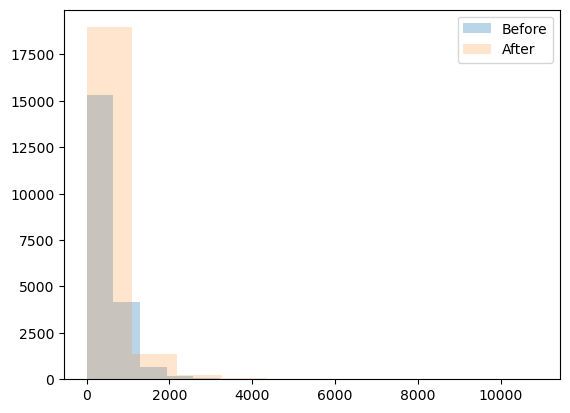

In [57]:
plt.hist(DF['total_bedrooms'],alpha=0.3,label='Before')
plt.hist(df_x['total_bedrooms'],alpha=0.2, label='After')
plt.legend()
plt.show()

In [58]:
df_x = DF[['total_bedrooms','total_rooms','households']]
df_x['new_total_bedrooms'] = df_x['total_rooms']*corr
corr_matrix = df_x.corr()
corr_matrix[['total_bedrooms','total_rooms','new_total_bedrooms']]

,total_bedrooms,total_rooms,new_total_bedrooms
total_bedrooms,1.000000,0.930380,0.930380
total_rooms,0.930380,1.000000,1.000000
households,0.979728,0.918484,0.918484
new_total_bedrooms,0.930380,1.000000,1.000000


In [59]:
X = df_x[['total_bedrooms','total_rooms','households']].dropna()
X['bedroom_per_room'] = X['total_bedrooms']/X['total_rooms']
X['bedrooms_per_household'] = X['total_bedrooms']/X['households']
X['total_rooms_per_household'] = X['total_rooms']/X['households']
X.corr()

,total_bedrooms,total_rooms,households,bedroom_per_room,bedrooms_per_household,total_rooms_per_household
total_bedrooms,1.000000,0.930380,0.979728,0.084238,0.045887,0.001538
total_rooms,0.930380,1.000000,0.918992,-0.187900,0.029373,0.133482
households,0.979728,0.918992,1.000000,0.065087,-0.055158,-0.080165
bedroom_per_room,0.084238,-0.187900,0.065087,1.000000,0.055905,-0.416952
bedrooms_per_household,0.045887,0.029373,-0.055158,0.055905,1.000000,0.848616
total_rooms_per_household,0.001538,0.133482,-0.080165,-0.416952,0.848616,1.000000


# E. Data Split

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(DF, test_size=0.3, random_state=42)

In [61]:
print(len(train_set),"train +", len(test_set),"test")

14448 train + 6192 test


# 3. Put things together: Example Demonstration. 

Data pre-processing is a very important stage in machine learning project because how well the model is trained, the meaningfulness of model is based on train data set - a model can have a stastically well done but may not tell a stroy. The preprocessing is therefore a stage where we spend most of time before we make models. The preprocessing is broadly separate into three parts: Data Cleaning, Data Transformation, and Data Reduction. We focus on exploratory data anslysis (EDA) to achieve insights and statistical measure in order to clean, tranform, and reduce the data to get ready for modeling. In this demonstration note, we will walk through to preprocessing using `Housing.csv` data. 

1. A Quick Look at the Data Structure.
2. Exploring Data Analysis (EDA)
3. Feature Engineering
4. Data Split

In [62]:
import pandas as pd

In [63]:
DF = pd.read_csv('Housing.csv')

## 3.1 A Quick Look at the Data Structure.

In [64]:
DF.shape

(20640, 10)

In [65]:
print(list(DF.columns))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [66]:
DF.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


- There are 10 columns - `longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`, `ocean_proximity`.
- use `shape` to find the size of data - 20640 rows and 10 columns. We are going to treat the problem as a supervised learning problem to predict `meadian_house_value` which we will call it a **target** and the rest **features**, **predictors**, or **attributes**. We call the rows **examples** or **observations**
- use `head` to observe how data looks is structured. However, it does not give descriptions of data. 

In [67]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


- use `info` to look for number of rows, and each attribute's type and number of non-null values. 
- notice `total_bedrooms` has only 20,433 non-null values while other attributes have 20,640 non-null values. This means that `total_bedrooms` have 207 missing values or *no observations*. 
- all attributes are numerical except the `ocean_proximity`. We see that this is a text data. 

In [68]:
DF["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [69]:
DF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The `describe()` method shows a summary of the numerical attributes. The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (see `total_bedrooms`). The std row shows the standard deviation. The 25%, 50%, and 75% rows show the corresponding *percentiles* - the value below which a given percentage of observations in a group of observation falls. 

 We also aggregate data by the group to learn. 

In [70]:
DF.groupby("ocean_proximity").agg({'mean'})

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
,mean,mean,mean,mean,mean,mean,mean,mean,mean
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


We often make a boxplot for a visualization.

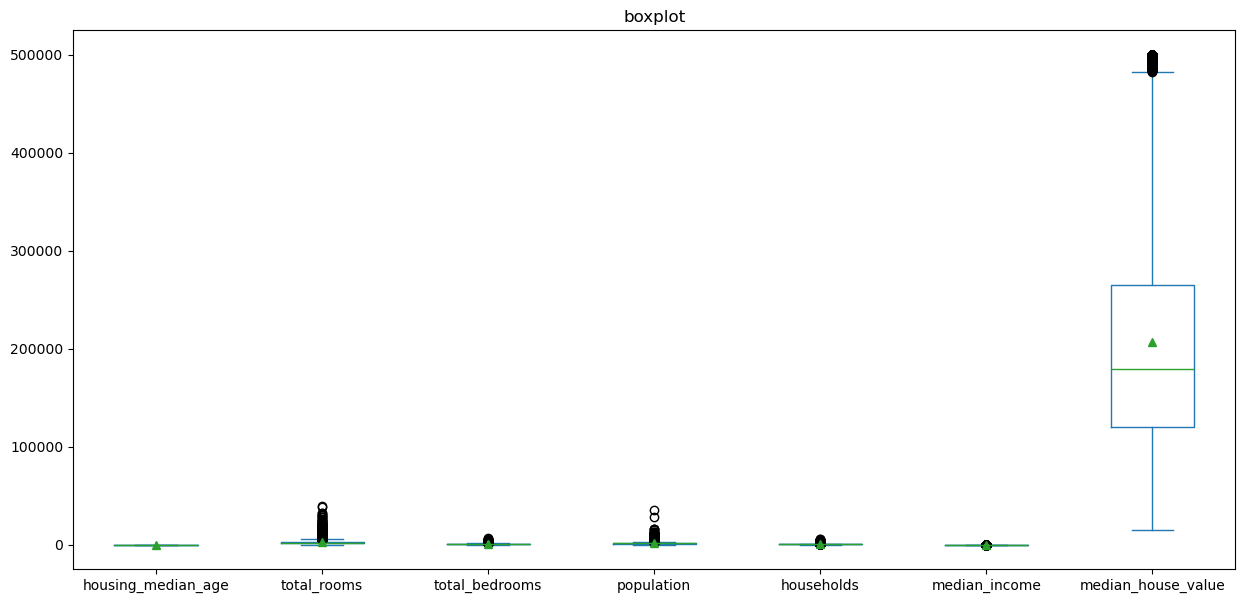

In [71]:
import matplotlib.pyplot as plt
features = DF.columns.tolist()

ax = DF[features[2:9]].plot(kind='box', title='boxplot', showmeans=True,figsize=(15,7))
plt.show()

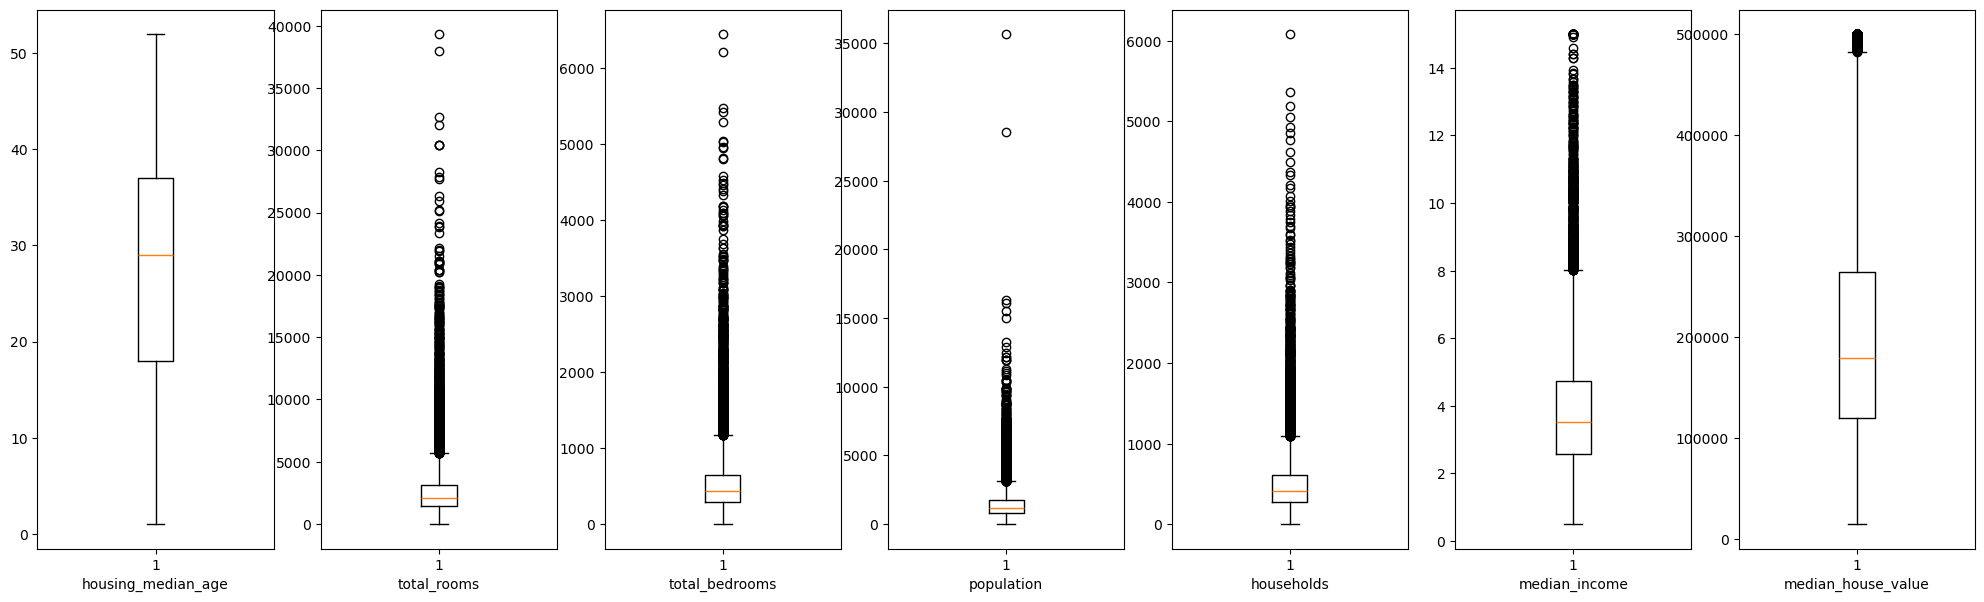

In [72]:
fig, axs = plt.subplots(1, len(features[2:9]), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(features[2:9])),features[2:9]):
    axs[i].boxplot(DF[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

We find missing values.

In [73]:
DF.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Only `total_bedrooms` have missing values.

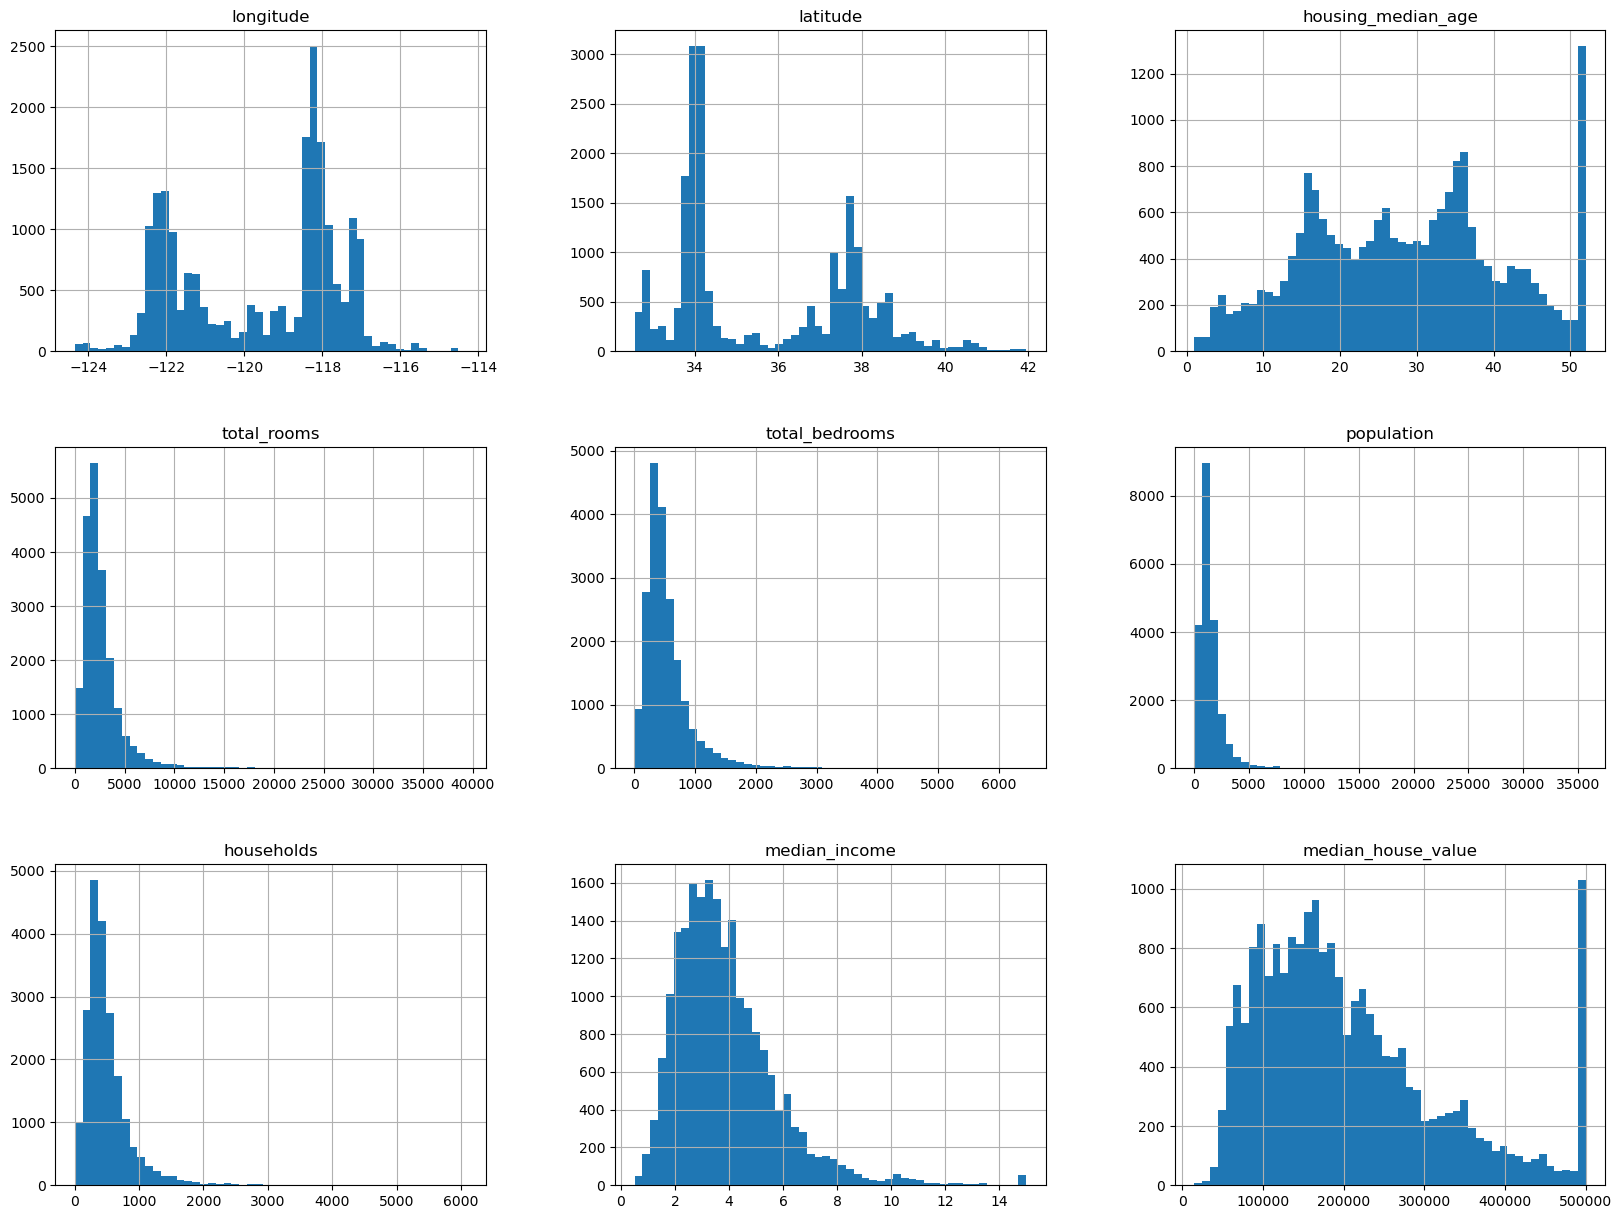

In [74]:
DF.hist(bins=50, figsize=(20,15))
plt.show()

There are few things to notice from histograms:
- The `median_income` is not in U.S. dollars. The data has been scaled and capped at 15 for higher median incomes and at 0.5 for lower median incomes. Working with preprocessed attributes is common in ML and it is not necessarily a problem. However, it is important to understand how the data was computed. 
- The `median_house_value` and `housing_median_age` are capped at 500,000 and 50, respectively. The former may be a serious problem since it is the target attribute and ML algorithms may learn that prices never go beyond that limit. If the goal is to predict `median_house_value` under \\$500,000, there is no problem - we can just use observations under the condition. However, if we have to predict even beyond \\$500,000, there we have two options:
    1. Collect proper labels for the districts whose labels were capped. 
    2. Remove these districts since it will poorly predict beyond \\$500,000 if they are included. (Do not assume that removing \\$500,000 observations without EDA is the right choice!)
- These features have very different scales. 
- Many histograms are *tail heavy*. This may make it a bit harder for some ML algorithms to detect patterns. We need to transform these attributes to have more **bell-shaped distributions**.

## 3.2. Exploring Data Analysis
### Visualization

Visualization is one of the easiest ways to understand the data structure - it is not only limited to the statistical measurements but also insights to learn about the data itself. 

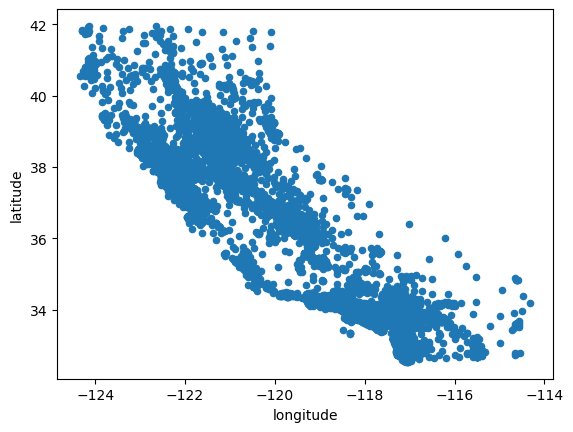

In [75]:
DF.plot(kind="scatter",x="longitude",y="latitude")
plt.show()

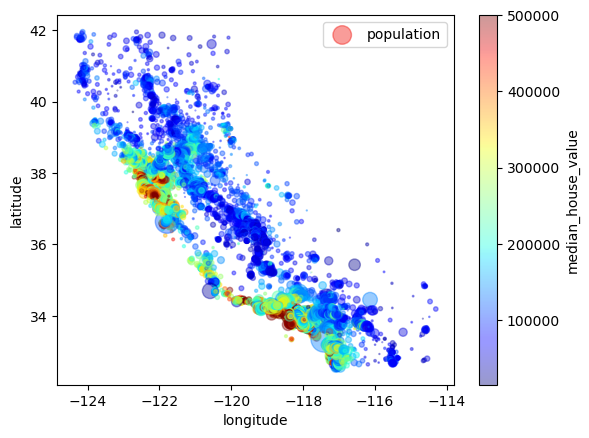

In [76]:
DF.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4, s=DF["population"]/100,
       label="population",c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

The scatter plots made provides us the geomatrical information of data. 
- We can see that the houses are located in California bayside. 
- We can see the poluations of data and understand which part of bayside have high and low median house value. 

### Correlations

We can use `corr()` to compute the *standard correlation coeficient* also known as (*Pearson's r*) between every pair of features. 
- The coefficent ranges from -1 to 1. Closer to 1 means that there is a strong positievv correlation and being closer to 0 means that there is no correlation. 

In [77]:
corr_matrix = DF.drop('ocean_proximity',axis=1).corr()

In [78]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

- the `median_house_value` tends to go up when the `median_income` goes up.
- the `median_house_value` tends to go down as `latitude` and `longitude` goes up. 
- the `median_income` has the strongest correlation. 

The correlation study brings important information that can help us to design the preprocessing. We can predict that `median income` will be a major feature in the prediction whereas `population` will have the least impact in the model. 

In [79]:
from pandas.plotting import scatter_matrix

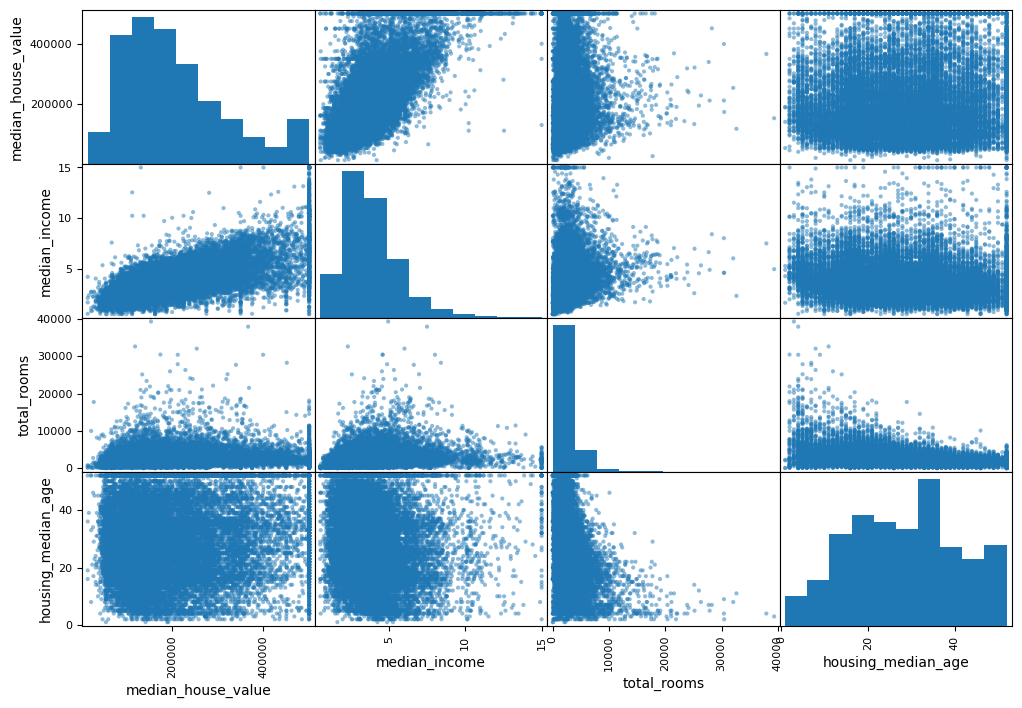

In [80]:
features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(DF[features], figsize=(12,8))
plt.show()

- For details, read the link: https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
- the most promising feature to predict the `median_house_income` is the `median_income`. 

In [81]:
corr = DF.drop('ocean_proximity',axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


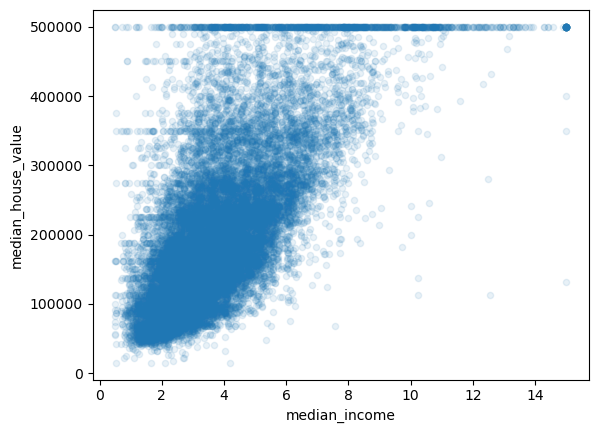

In [82]:
DF.plot(kind="scatter", x="median_income",y="median_house_value", alpha=0.1)
plt.show()

- the correlation is strong. 
- there is a price cap having a horizontal line at \\$500,000.
- Reveals other less obvious straight lines around \\$450,000, \\$350,000, and \\$280,000. 

## 3.3 Data Mining & Feature Engineering
### New Combinded Features

Consider the following arguement:
1. the `total_rooms` is not useful if the `household` is not known. 
2. the `total_bedrooms` itself is not useful if the `total_rooms` is not known. 
3. the arguments above does not come from ML experience, but more from how well deeply we about the data and the case. 

In [83]:
DF["rooms_per_household"]=DF["total_rooms"]/DF["households"]
DF["bedrooms_per_room"]=DF["total_bedrooms"]/DF["total_rooms"]
DF["population_per_household"]=DF["population"]/DF["households"]

In [84]:
corr_matrix=DF.drop('ocean_proximity',axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

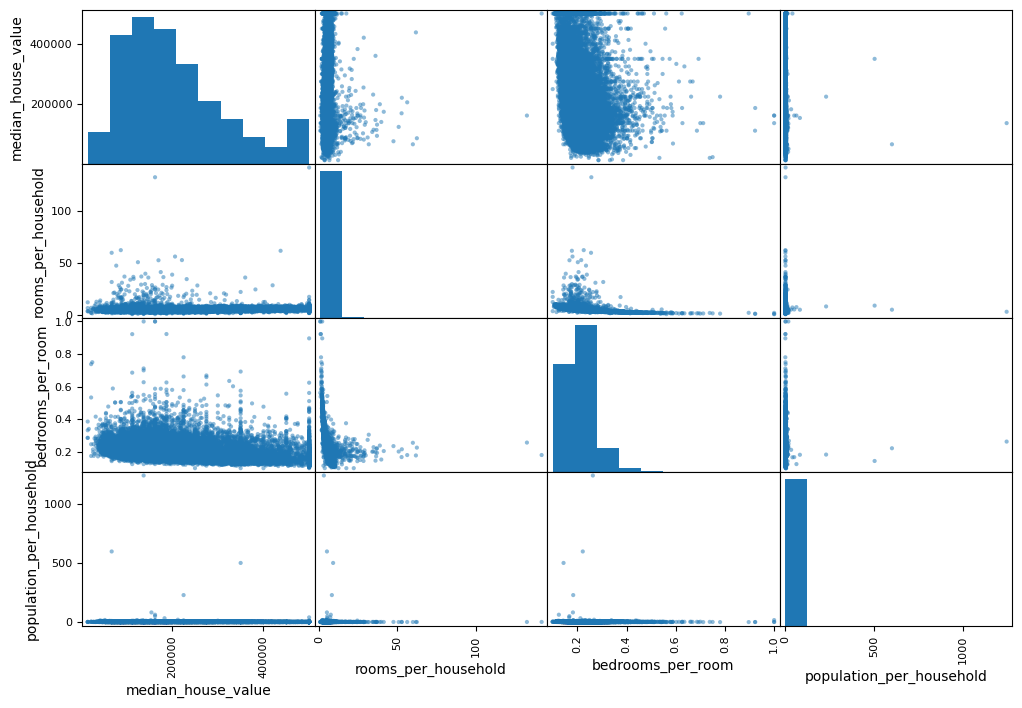

In [85]:
features = ["median_house_value", "rooms_per_household", "bedrooms_per_room", "population_per_household"]
scatter_matrix(DF[features], figsize=(12,8))
plt.show()

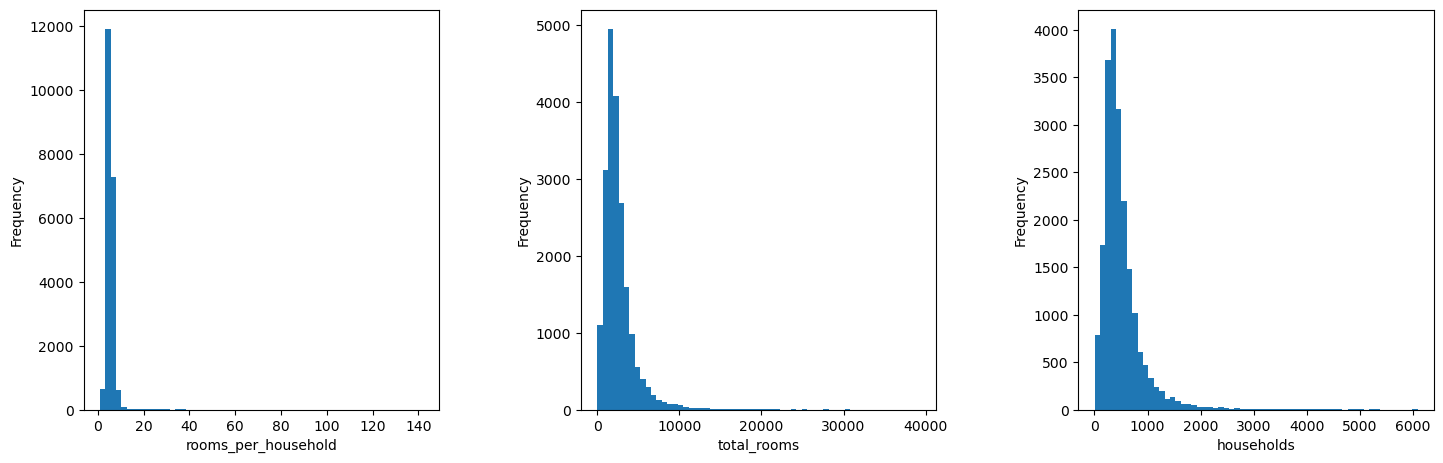

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

n, bins, patches = ax1.hist(DF["rooms_per_household"],bins=60)
ax1.set_xlabel('rooms_per_household')
ax1.set_ylabel('Frequency')

n, bins, patches = ax2.hist(DF["total_rooms"],bins=60)
ax2.set_xlabel('total_rooms')
ax2.set_ylabel('Frequency')

n, bins, patches = ax3.hist(DF["households"],bins=60)
ax3.set_xlabel("households")
ax3.set_ylabel('Frequency')
plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

- The `bedrooms_per_room` is much more correlated with the `median_house_value` than the `total_rooms` and the `total_bedrooms`. 
- Houses with a lower bedroom/room ratio tend to be more expensive. 
- The `rooms_per_household` is much informative than the `total_rooms`. 
- Bigger the house is, much expensive the house is. 
- This exploration does not have to be absolutely thorough - the point is to start off on the right foot and quickly gain insights that will help us to get a first reasonably good prototype. This is an iterative process. 

### Handling Missing Values

In [87]:
DF.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

Missing Value Handling:
- Impute with averge, median, any specific number (.e.g, 0), or drop 
- Use `fillna()` to fill in missing values
- If we decided to drop, we must consider dropping the column or the rows. 
    - use `dropna()` to delete all rows for having a column with missing values. 
    - use `drop()` to delete the column. 

In [88]:
DF.dropna(subset=['total_bedrooms']).shape

(20433, 13)

In [89]:
DF.drop("total_bedrooms",axis=1).shape

(20640, 12)

In [90]:
median=DF["total_bedrooms"].median()
average=DF["total_bedrooms"].mean()
print("median is",median)
print("average is", average)

median is 435.0
average is 537.8705525375618


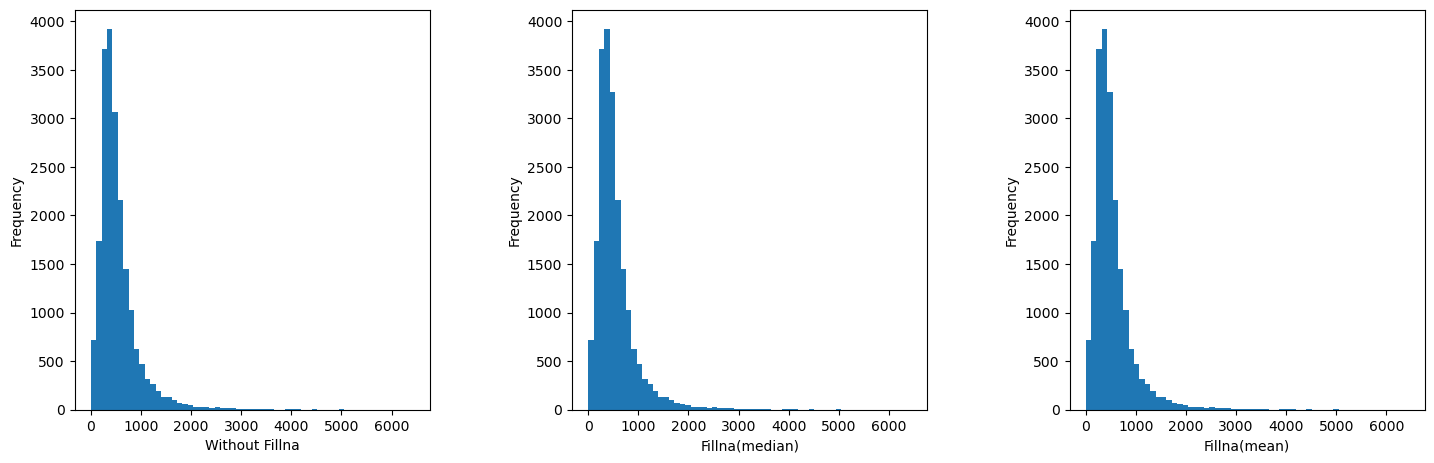

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

n, bins, patches = ax1.hist(DF["total_bedrooms"],bins=60)
ax1.set_xlabel('Without Fillna')
ax1.set_ylabel('Frequency')

n, bins, patches = ax2.hist(DF["total_bedrooms"].fillna(median),bins=60)
ax2.set_xlabel('Fillna(median)')
ax2.set_ylabel('Frequency')

n, bins, patches = ax3.hist(DF["total_bedrooms"].fillna(average),bins=60)
ax3.set_xlabel('Fillna(mean)')
ax3.set_ylabel('Frequency')
plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

The **Kolmogorov-Smirnov test (KS-Test)** is a nonparametric test of the equality of continuous or discontinous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution or to compare two samples. 

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case).

In [92]:
from scipy.stats import ks_2samp
ks_2samp(DF["total_bedrooms"].dropna(),DF["total_bedrooms"].fillna(median))

KstestResult(statistic=0.005011344507687643, pvalue=0.9575858124995899, statistic_location=434.0, statistic_sign=1)

In [93]:
ks_2samp(DF["total_bedrooms"].dropna(),DF["total_bedrooms"].fillna(average))

KstestResult(statistic=0.00645339447473825, pvalue=0.7833422668265202, statistic_location=537.0, statistic_sign=1)

Under the null hypothesis the two distributions are identical. If the K-S statistic is small or the p-value is high (greater than the significance level, say 5%), then we cannot reject the hypothesis that the distributions of the two samples are the same. Conversely, we can reject the null hypothesis if the p-value is low.
- Therefore, we can either drop all `total_bedrooms` missing observations or fill either with the median or the average of `total_bedrooms`. 

We also can use `SimpleImputer()` from `sklearn.impute` to fillin all `Nan`. 

In [94]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = DF.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [95]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [96]:
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [97]:
X = imputer.transform(housing_num)
housing_tr=pd.DataFrame(X, columns=housing_num.columns)

In [98]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.212940,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057700,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175708,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239273,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [99]:
housing_tr.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [100]:
ks_2samp(DF["bedrooms_per_room"],housing_tr["bedrooms_per_room"])

KstestResult(statistic=0.01002906976744189, pvalue=0.2487036882495567, statistic_location=0.20316243411595591, statistic_sign=-1)

### Handling Categorical and Text Data:
- Most ML algorithms prefer to work with numbers. Therefore, converting text labels to numbers may bring meaningful information about data than just dropping. 
- The `ocean_proximity` is in text and we cau use `LabelEncoder()` to convert the text to numbers. 

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = DF["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [102]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


- `OneHotEncoder()` encorder converts inteter categorical values into one-hot vectors. 
- Note that `fit_transform()` expects 2-D array and we need to reshape `DF_cat_encoded` because it is in 1-D array. 

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [104]:
encoder=OneHotEncoder()
housing_cat_encoded_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_encoded_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [105]:
housing_cat_encoded_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

- We get a matrix with 5 columns with 0 and 1 per row. 
- We can use `LabelBinarizer()` to do the same work in one shot. 

In [106]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_encoded_1hot=encoder.fit_transform(housing_cat_encoded)
housing_cat_encoded_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [107]:
housing_Encoded=pd.DataFrame(housing_cat_encoded_1hot)

In [108]:
housing_Encoded.head(5)

,0,1,2,3,4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [109]:
housing_Encoded.columns=['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN']

In [110]:
housing_Encoded.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [111]:
DF_final = pd.concat([housing_tr, housing_Encoded], axis=1)

In [112]:
DF_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_household       20640 non-null  float64
 10  bedrooms_per_room         20640 non-null  float64
 11  population_per_household  20640 non-null  float64
 12  <1H OCEAN                 20640 non-null  int32  
 13  INLAND                    20640 non-null  int32  
 14  ISLAND

### Feature Scaling
One of the most important transformations need to aaply to data is *feature scaling*. With few exceptions, ML algorithms do not perform well when the input numerial attributes have very different scales. 

Two common ways: *Min-Max Scaling* and *standarization*

***Min-Max Scaling*** (**Normalization**): values are shifted and rescaled ending up from 0 to 1. Scikit-Learn provies a transformer called `MinMaxScaler`. 

***Standarization***: Does not have specific range values and much less affective to outliers. Scikit-Learn provies a transformer called `StandardScaler`. 
- The dataset is labeled and if we are going to predict `median_house_value`, then this is **supervised learning**. 
- If the linear models that assumes features are in Gaussian distribution such as **linear regression** is going to be used, then we need to standardize them.
- If we are going to use other non-linear models such as tree-based algorithms (e.g., **decision tree, random forest**), then we do not need to scale the data.
- If we are oing to classify the `ocean_proximity`, then we should concanate **housing_cat_encoded** instead. 

We are going to drop outliers for all features. 
- In the example, the outliers will be considered observations of each feature being 1 or 99 percentile. 

In [113]:
cols = housing_tr.columns.tolist()
DF_ = DF_final
for col in cols:
    q01 = DF_[col].quantile(0.01)
    q99 = DF_[col].quantile(0.99)
    DF_ = DF_[(DF_[col]>q01) & (DF_[col]<q99)]

In [114]:
print(DF_.shape,DF_final.shape)

(14834, 17) (20640, 17)


In [115]:
corr = DF_final[cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092096,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113139,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.135366,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187184,-0.024581
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.001765,0.084618,-0.028325
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035081,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.080598,0.064698,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.326895,-0.612262,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.254632,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001765,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416106,-0.004852


In [116]:
corr = DF_[cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.929587,-0.007365,-0.014967,0.030398,0.090897,0.026406,-0.040695,-0.045659,-0.116603,0.126191,0.168738
latitude,-0.929587,1.000000,-0.076970,0.019389,-0.035521,-0.100933,-0.040025,-0.052272,-0.148244,0.163168,-0.157190,-0.167074
housing_median_age,-0.007365,-0.076970,1.000000,-0.384875,-0.321526,-0.279439,-0.310284,-0.180566,0.043687,-0.253947,0.160645,0.054995
total_rooms,-0.014967,0.019389,-0.384875,1.000000,0.895977,0.818518,0.909686,0.256845,0.184556,0.292876,-0.230178,-0.155349
total_bedrooms,0.030398,-0.035521,-0.321526,0.895977,1.000000,0.855652,0.980135,-0.034486,0.072462,-0.064935,0.158491,-0.185019
population,0.090897,-0.100933,-0.279439,0.818518,0.855652,1.000000,0.884379,-0.011241,-0.031855,-0.077911,0.097600,0.261458
households,0.026406,-0.040025,-0.310284,0.909686,0.980135,0.884379,1.000000,0.006062,0.092287,-0.084438,0.117449,-0.169241
median_income,-0.040695,-0.052272,-0.180566,0.256845,-0.034486,-0.011241,0.006062,1.000000,0.666005,0.662224,-0.691385,-0.082869
median_house_value,-0.045659,-0.148244,0.043687,0.184556,0.072462,-0.031855,0.092287,0.666005,1.000000,0.282514,-0.264328,-0.287890
rooms_per_household,-0.116603,0.163168,-0.253947,0.292876,-0.064935,-0.077911,-0.084438,0.662224,0.282514,1.000000,-0.878383,-0.059107


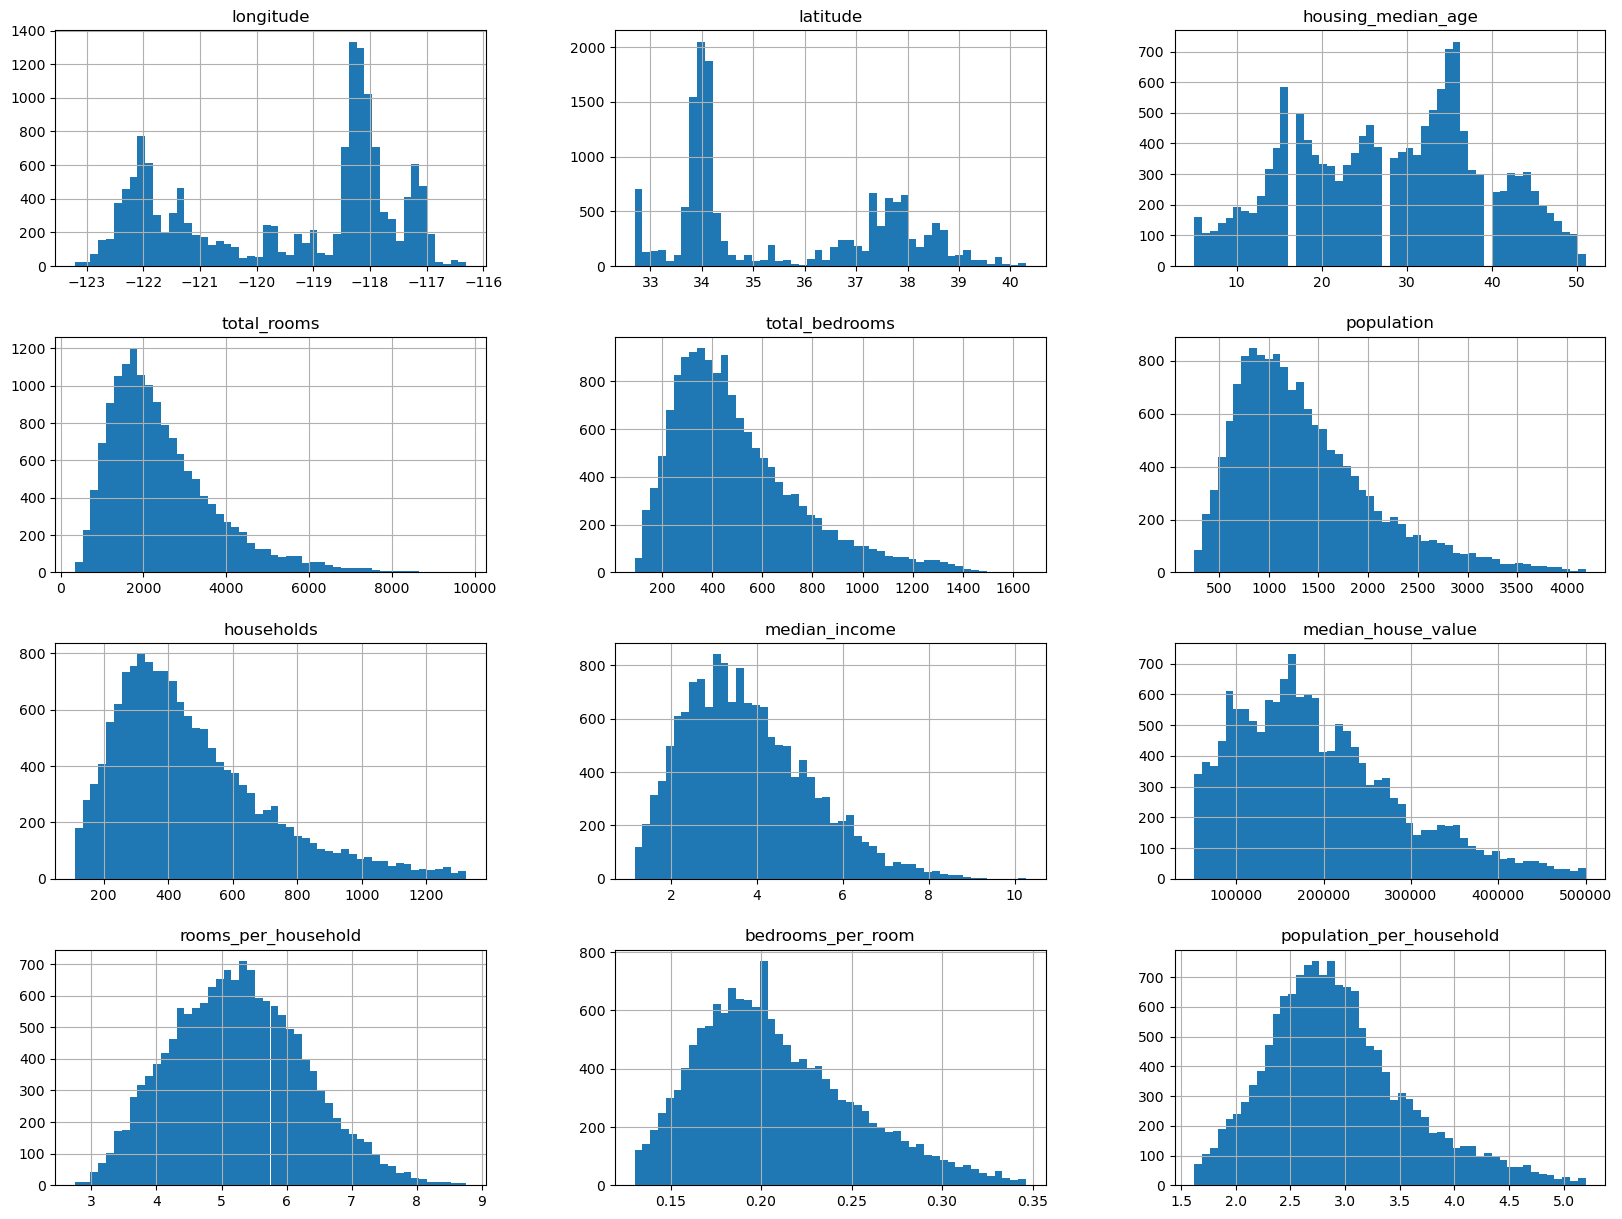

In [117]:
DF_[cols].hist(bins=50, figsize=(20,15))
plt.show()

In [118]:
left_skew, right_skew,norm_ = [],[],[]
for col in cols:
    skew_coef = DF_[col].skew()
    if (skew_coef<-0.05):
        print(col,"left skewed",DF_[col].skew())
        left_skew.append(col)
    elif (skew_coef>0.05):
        print(col,"right skewed",DF_[col].skew())
        right_skew.append(col)
    else: 
        print(col,"close to Gaussian")
        norm_.append(col)

longitude left skewed -0.3592252992943573
latitude right skewed 0.40618947936212096
housing_median_age left skewed -0.08682358494664574
total_rooms right skewed 1.3367048365512666
total_bedrooms right skewed 1.1290133589132427
population right skewed 1.1215950641005608
households right skewed 1.0739410638872737
median_income right skewed 0.6830024520307586
median_house_value right skewed 0.8096122124710207
rooms_per_household right skewed 0.24668609811136935
bedrooms_per_room right skewed 0.655561361885236
population_per_household right skewed 0.6989204665881439


In [119]:
for col in right_skew[1:]:
    DF_[col] = stats.boxcox(DF_[col])[0]
    X_skew = pd.Series(DF_[col]).skew()
    if (abs(X_skew)<=0.05):
        print(col,X_skew)

total_rooms -0.0015072196490833125
total_bedrooms -0.0033120594809925045
population -0.004751304753614059
households -0.004133782780061336
median_income -0.013894011284430696
median_house_value -0.019513033200961354
rooms_per_household -0.0120027142422978
bedrooms_per_room 0.01493675669747452
population_per_household 0.0014580871118153441


In [120]:
for col in left_skew[1:]:
    DF_[col] = stats.boxcox(DF_[col])[0]
    X_skew = pd.Series(DF_[col]).skew()
    if (abs(X_skew)<=0.05):
        print(col,X_skew)

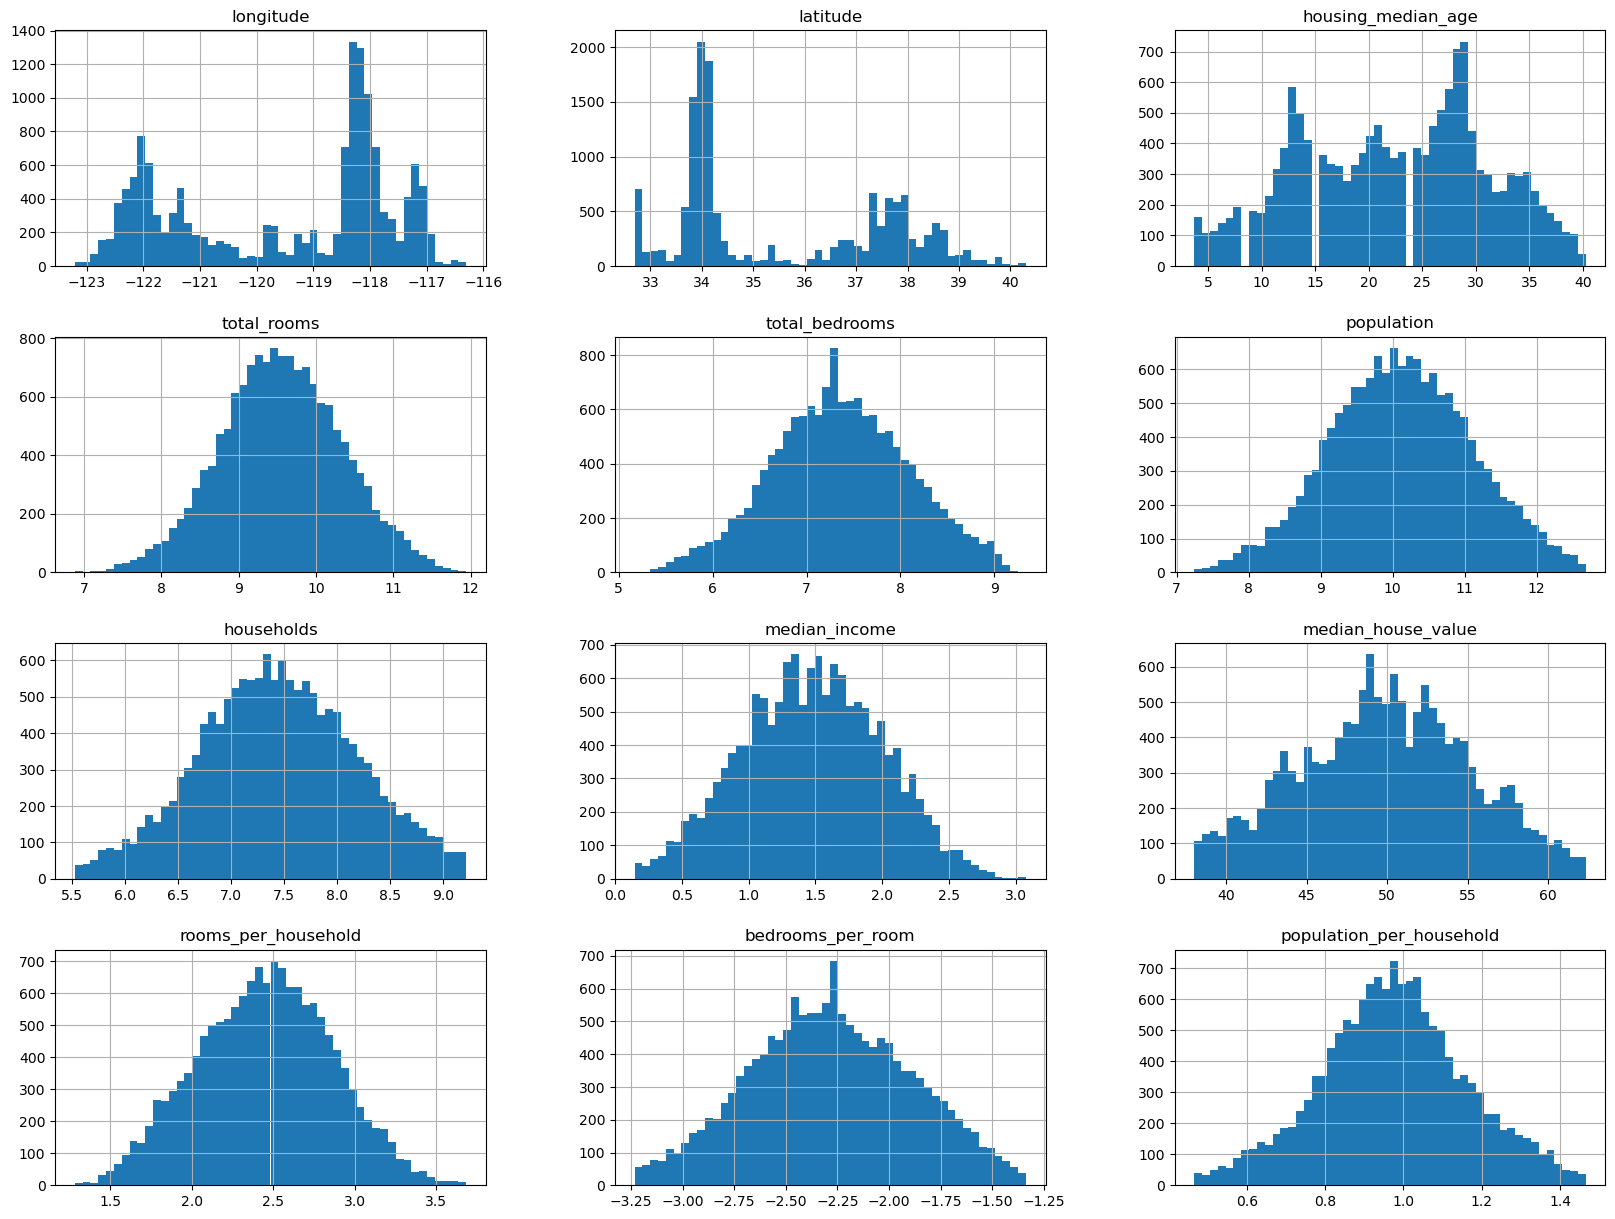

In [121]:
DF_[cols].hist(bins=50, figsize=(20,15))
plt.show()

In [122]:
DF_.to_csv('./Housing_scaled_01.csv')

In [123]:
corr = DF_[cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.929587,-0.007130,-0.010685,0.036118,0.104534,0.037926,-0.040175,-0.023111,-0.121242,0.114588,0.155159
latitude,-0.929587,1.000000,-0.077427,0.014054,-0.042908,-0.117419,-0.054076,-0.055182,-0.187055,0.169589,-0.138422,-0.148002
housing_median_age,-0.007130,-0.077427,1.000000,-0.370501,-0.303001,-0.265266,-0.290864,-0.176350,0.030739,-0.246830,0.183157,0.043990
total_rooms,-0.010685,0.014054,-0.370501,1.000000,0.915144,0.832137,0.924837,0.258894,0.193359,0.295167,-0.242003,-0.162391
total_bedrooms,0.036118,-0.042908,-0.303001,0.915144,1.000000,0.878431,0.980523,-0.028673,0.080626,-0.064623,0.152615,-0.184196
population,0.104534,-0.117419,-0.265266,0.832137,0.878431,1.000000,0.904265,-0.013094,-0.013359,-0.092092,0.089180,0.268293
households,0.037926,-0.054076,-0.290864,0.924837,0.980523,0.904265,1.000000,0.015067,0.104957,-0.089738,0.108605,-0.168152
median_income,-0.040175,-0.055182,-0.176350,0.258894,-0.028673,-0.013094,0.015067,1.000000,0.677140,0.643659,-0.730392,-0.059443
median_house_value,-0.023111,-0.187055,0.030739,0.193359,0.080626,-0.013359,0.104957,0.677140,1.000000,0.252692,-0.297483,-0.268059
rooms_per_household,-0.121242,0.169589,-0.246830,0.295167,-0.064623,-0.092092,-0.089738,0.643659,0.252692,1.000000,-0.903241,-0.003351


In [124]:
DF_.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,32.672294,8.208606,5.645033,7.675271,5.705034,2.728723,61.003713,3.113150,-2.957260,0.876915,0,0,0,1,0
1,-122.22,37.86,17.070476,11.413717,8.717972,11.487953,8.974699,2.724071,58.036799,2.848110,-2.822167,0.707407,0,0,0,1,0
8,-122.26,37.84,33.434943,9.799169,7.954136,10.099133,7.961036,0.797670,52.585885,2.062241,-1.811675,0.671329,0,0,0,1,0
15,-122.26,37.85,39.491212,8.560402,6.722807,9.055987,6.750997,0.822822,47.360433,2.038908,-1.864239,0.905250,0,0,0,1,0


## 3.4 Data Split

In [125]:
import numpy as np
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(DF_, test_size=0.2, random_state=42)

In [126]:
print(len(train_set),"train +", len(test_set),"test")

11867 train + 2967 test


- `train_test_split` is the simplest function to split data. 
- `random_state`: allows to set the random generator seed, pass it multiple datasets with an identical number of rows,  and split them on the same indices. 

# 4. Conclusion
- In this lecture, we walked through the general ML project workflow. 
- The ML project is "garbage in, garbage out".
- The data preprocessing is very important and it impacts the result. 
- There are many different and creative ways to attack the problem.
    - having strong understandability of different ML algorithms and techqniques is a strong asset. 
    - due the the unlimited way of attacking the problem, being creative can bring insteresting stories of dataset. 
- There are more things to aware in preprocessing and making traning and test sets than the example we seen in this lecture. 